<font size=6 color=black ><b>ChIP-seq protocol

# Outline
- [Single-read and Paired-End](#Single-read-and-Paired-End)
- [What are reads, contigs and scaffold?](#What-are-reads,-contigs-and-scaffold?)
- [ChIP-seq theory](#ChIP-seq-theory)
- [CUT&TAG theory](#CUT&TAG-theory)
- [Environment setup](#Environment-setup)
- [Convert SSR to FASTQ](#Convert-SSR-to-FASTQ)
  - [parallel-fastq-dump](#parallel-fastq-dump)
- [Structure of FASTQ](#Structure-of-FASTQ)
  - [What the structure of FASTQ？](#What-the-structure-of-FASTQ？)
  - [phred33 encoding and phred64 encoding](#phred33-encoding-and-phred64-encoding)
  - [View FASTQ basic information](#View-FASTQ-basic-information)
- [QC Report and Data cleaning——trim-galore](#QC-Report-and-Data-cleaning——trim-galore)
  - [QC Report——fastqc](#QC-Report——fastqc)
  - [Stucture of QC report](#Stucture-of-QC-report)
    - [Basic Statistics](#Basic-Statistics)
    - [Per base sequence quality](#Per-base-sequence-quality)
    - [Per tile sequence quality](#Per-tile-sequence-quality)
    - [Per sequence quality scores](#Per-sequence-quality-scores)
    - [Per base sequence content](#Per-base-sequence-content)
    - [Per base sequence content in CUT&Tag](#Per-base-sequence-content-in-CUT&Tag)
    - [Per sequence GC conten](#Per-sequence-GC-conten)
    - [Per base N content](#Per-base-N-content)
    - [Sequence Length Distribution](#Sequence-Length-Distribution)
    - [Sequence Duplication Level](#Sequence-Duplication-Level)
    - [Overrepresented sequences](#Overrepresented-sequences)
    - [Adapter Content](#Adapter-Content)
    - [Overrepresented Kmers](#Overrepresented-Kmers)
  - [QC report reference in CUT&Tag](#QC-report-reference-in-CUT&Tag)
  - [Data cleaning——cutadapt](#Data-cleaning——cutadapt)
- [Reads Alignment](#Reads-Alignment)
  - [Different of DNAseq alignment and RNAseq alignment](#Different-of-DNAseq-alignment-and-RNAseq-alignment)
  - [Method of DNAseq alignment——seed and extend](#Method-of-DNAseq-alignment——seed-and-extend)
  - [Different of Signle-read alignment and Paired-End alignment](#Different-of-Signle-read-alignment-and-Paired-End-alignment)
  - [Global Alignment and Local Alignment](#Global-Alignment-and-Local-Alignment)
  - [Software selection of Alignment](#Software-selection-of-Alignment)
  - [Bowtie2](#Bowtie2)
  - [Bowtie2 in CUT&Tag](#Bowtie2-in-CUT&Tag)
  - [Use the E.coli genome to normalize data (optional/recommended)(step1)](#Use-the-E.coli-genome-to-normalize-data-(optional/recommended)(step1))
- [Samtools](#Samtools)
   - [Samtools sort](#Samtools-sort)
   - [Samtools idxstats——view the alignment with chromosome](#Samtools-idxstats——view-the-alignment-with-chromosome)
   - [Samtools flagstat——view the alignment results](#Samtools-flagstat——view-the-alignment-results)
- [Convert SAM to BAM/CRAM](#Convert-SAM-to-BAM/CRAM)
   - [Structure of SAM](#Structure-of-SAM)
   - [Structure of BAM](#Structure-of-BAM)
   - [Structue of CRAM](#Structue-of-CRAM)
- [Remove duplicates](#Remove-duplicates)
  - [Patterned Flowcell?](#Patterned-Flowcell?)
  - [Software selection of remove duplicates](#Software-selection-of-remove-duplicates)
  - [Picard MarkDuplicates](#Picard-MarkDuplicates)
  - [Remove duplicates in CUT&Tag](#Remove-duplicates-in-CUT&Tag)
- [Assess mapped fragment size distribution in CUT&Tag(optial)](#Assess-mapped-fragment-size-distribution-in-CUT&Tag(optial))
   - [Extract segment length and count](#Extract-segment-length-and-count)
- [Alignment filtering with MAPQ (optinal)](#Alignment-filtering-with-MAPQ-(optinal))
  - [Mapping Quality](#Mapping-Quality)
  - [Filter minQualityScore](#Filter-minQualityScore)
  - [View the reads before and after filtering](#View-the-reads-before-and-after-filtering)
- [Alignment filtering with Mapped Read Pairs](#Alignment-filtering-with-Mapped-Read-Pairs)
- [Bedtools](#Bedtools)
  - [Bedtools introduction](#Bedtools-introduction)
  - [Installing Bedtools](#Installing-Bedtools)
  - [Bedtools genomecov](#Bedtools-genomecov)
  - [Bedtools intersect](#Bedtools-intersect)
- [Convert BAM to BED](#Convert-BAM-to-BED)
  - [0-base or 1-base？](#0-base-or-1-base？)
  - [Strcture of BED](#Strcture-of-BED)
  - [Convert BAM to BED with bedtools](#Convert-BAM-to-BED-with-bedtools)
  - [Keep the read pairs that are on the same chromosome and fragment length less than 1000bp（optial）](#Keep-the-read-pairs-that-are-on-the-same-chromosome-and-fragment-length-less-than-1000bp（optial）)
  - [Extract the fragment related columns](#Extract-the-fragment-related-columns)
  - [Evaluate the reproducibility of replicate samples(optial)](#Evaluate-the-reproducibility-of-replicate-samples(optial))
- [Strcture of GFF3 and VCF(optial reading)](#Strcture-of-GFF3-and-VCF(optial-reading))
  - [Strcture of GFF3](#Strcture-of-GFF3)
  - [Strcture of VCF](#Strcture-of-VCF)
- [Convert BED to Bedgraph](#Convert-BED-to-Bedgraph)
  - [Strcture of bedgraph](#Strcture-of-bedgraph)
  - [Use the E.coli genome to normalize data (optional/recommended)(step2)](#Use-the-E.coli-genome-to-normalize-data-(optional/recommended)(step2))
- [Quantification of peaks](#Quantification-of-peaks)
  - [SEACR(For CUT&Tag and CUT&RUN)](#SEACR(For-CUT&Tag-and-CUT&RUN))
  - [Stracture of SEACR bed file](#Stracture-of-SEACR-bed-file)
  - [Number of peaks](#Number-of-peaks)
  - [Comparing the same peaks on replicate sample data sets(optial)](#Comparing-the-same-peaks-on-replicate-sample-data-sets(optial))
  - [Calculates FRiPs (Fraction of Reads in Peaks)](#Calculates-FRiPs-(Fraction-of-Reads-in-Peaks))
- [Genome browser](#Genome-browser)
- [Normalization methods](#Normalization-methods)
  - [RPKM](#RPKM)
  - [CPM](#CPM)
  - [BPM](#BPM)
  - [RPCG](#RPCG)
- [Deeptools](#Deeptools)
  - [Deeptools installation](#Deeptools-installation)
  - [BamCoverage](#BamCoverage)

# Single-read and Paired-End

<img src="./picture/001.png" width="600"/>

单端测序只从一侧读，而双端测序是两头同时读然后拼接

* **单端测序(Single-read)**

> **简写:SE50** 只测一个方向，且读段长度固定为50 bp

> Single-Read测序(Single-read)首先将DNA样本进行片段化处理形成200-500bp的片段，引物序列连接到DNA片段的一端，然后末端加上接头，将片段固定在flow cell上生成DNA簇，上机测序单端读取序列。该方式建库简单，操作步骤少，常用于小基因组、转录组、宏基因组测序。

> 测序的质量会随着测序的进行而下降，所以 reads 约往后面越不准确，单端测序下游质量会很差，所以就引入了双端测序可以大大提高测序的准确率。


* **双端测序(Paired-End)**

> **简写:25x25 PE** 每个片段会从两个方向进行测序，每个读段长度为25 bp

>通过构建Paired-end文库制备，指在构建待测DNA文库时在两端的接头上都加上测序引物结合位点，在第一轮测序完成后，去除第一轮测序的模板链，用对读测序模块(Paired-End Module)引导互补链在原位置再生和扩增，以达到第二轮测序所用的模板量，进行第二轮互补链的合成测序。

* 双端测序文库结构示例：

<img src="./picture/002.png" width="600"/>

>为了两个方向上分别进行测序，就需要有两个不同方向的测序引物（下图 Rd1 SP 和 Rd2 SP）；

>为了区分两个方向的 reads，其中一个测序引物前面要添加一小段 index 序列进行标记。

* 双端测序流程示例：

<img src="./picture/003.png" width="800"/>

# What are reads, contigs and scaffold?

<img src="./picture/050.png" width="700"/>

* **Reads**是测序仪直接产生的短片段 DNA 序列。它们是基因组序列的基本单位。

* **Contig**是通过将重叠的 reads 拼接起来，组装而成的连续 DNA 序列，Contig 不包含缺口，是从 reads 直接拼接得来的最连续的部分

* **Scaffold** 是更高层次的组装结构，它将多个 contig 连接在一起，可能使用额外信息（如 mate-pair reads 或物理图谱数据）来排列和定向这些 contig。Scaffold 之间可能有未知的区域（这些区域用 N 表示）。

# ChIP-seq theory
- 使用甲醛将目标蛋白（组蛋白，转录因子等）与染色质交联固定起来
<img src="./picture/004.png" width="500"/>

- 从细胞裂解液分离基因组DNA，通过超声打断DNA为一定长度的小片段
<img src="./picture/005.png"  width="500"/>

- 添加与目标蛋白质特异的抗体，该抗体会与目标蛋白形成免疫结合复合体沉淀（靶蛋白 + 抗体 + 靶蛋白结合的DNA），收集这些沉淀
<img src="./picture/006.png"  width="500"/>

- 去交联，分开蛋白与DNA，纯化DNA即可得到染色质免疫沉淀的DNA样本
<img src="./picture/007.png"  width="500"/>

- 建立好文库，用测序仪进行测序
<img src="./picture/008.png"  width="500"/>

# CUT&TAG theory

* 首先，特异性抗体和靶标蛋白孵育结合；加入Tn5转座酶—Protein A复合物，其中Tn5转座酶两端已装载好建库接头引物

* 特异性抗体和Protein A相结合，转座酶Tn5被“拉”到转录因子附近；转座酶Tn5一次性完成附近DNA打断并完成NGS加接头过程，可直接建库

<img src= "./picture/010.png" width="600"/>

* 对比ChIP-seq，CUT&TAG免去了甲醛交联、超声破碎和免疫共沉淀的过程

* 这样既节省了初始实验材料，需求的细胞量较少，又提高了信噪比、提升了实验重复性

<img src="./picture/011.png" width="600"/>

* [CUT&TAG数据分析流程](https://yezhengstat.github.io/CUTTag_tutorial/)

# Environment setup

* **显示已创建的环境，会列出所有的环境名和对应路径:**
`conda info -e `

* **创建chip-seq环境:**
`conda  create -n chipseq  python=2 `

* **激活环境:**
`conda activate chipseq`


# Convert SSR to FASTQ
## parallel-fastq-dump

* [parallel-fastq-dump](https://github.com/rvalieris/parallel-fastq-dump)

* **Software installation:** `sudo apt install parallel-fastq-dump`

<font size=3 color=purple ><b>parameters

In [ ]:
    parallel-fastq-dump 
    --sra-id # 输入文件名
    --threads # 用的核数
    --outdir # 输出文件
    --split-files # 文件是否切割来运行
    --gzip # 输出文件是否为压缩包

<font size=3 color=purple ><b>Example

In [ ]:
parallel-fastq-dump --sra-id IP_H3K27ac_Vehicle --threads 11 --outdir fastq.data/ --split-files --gzip

<font size=3 color=red ><b>如果一个srr文件转化为两个fastq文件，说明该数据为双端测序

# Structure of FASTQ

## What the structure of FASTQ？
对于每个通过质控参数的簇，一个序列被写入相应样本的R1 FASTQ文件，而对于双端测序运行，另外一个序列也被写入该样本的R2 FASTQ文件。 

**FASTQ文件中的每个条目包含4行**

<img src="./picture/012.png" width="800"/>

> 序列标识符，其中包含有关测序运行和簇的信息。 该行的具体内容会因使用的BCL到FASTQ转换软件而不同。

> 序列（碱基信号； A，C，T，G和N）。

> 分隔符，只是一个加号（+）。

> 读取碱基的质量值。 这些是Phred +33编码的，使用ASCII字符表示数字质量值。

## phred33 encoding and phred64 encoding

* Phred+33编码方式下，质量值范围是33到74（ASCII字符范围是!到J）。这种编码方式最早由Illumina 1.8及之后的测序仪器采用，是目前使用最广泛的一种编码方式。

* Phred+64编码方式下，质量值范围是64到104（ASCII字符范围是@到h）。这种编码方式由早期的Illumina测序仪（比如Illumina 1.3到1.7版本）使用。

## View FASTQ basic information

* **获取序列标识符，其中包含有关测序运行和簇的信息，有些包含测序平台信息**`zcat <xxx.fastq.gz> | grep "^@" | head -n 5`


# QC Report and Data cleaning——trim-galore

<font size=3 color=red ><b>trim-galore有2个小软件，分别是cutadapt用于去除接头及质量过滤，fastqc用于查看数据质量分布

* **Software installation**

`conda install bioconda::trim-galore `

* **可以创建一个新的环境，用Python3，启用多线程（trim-galore中的cutadapt在python2 不支持多线程操作），推荐用这个**

`conda  create -n trim-galore  python=3.6`

`conda activate trim-galore`

`conda install bioconda::trim-galore`

## QC Report——fastqc
**生成质控报告，可以先做质控报告，如果都合格就没必要做trim_galore**

<font size=3 color=purple ><b>parameters

In [ ]:
    fastqc # 输入文件名
    -o # 输出文件名
    -t <int>  # 核心数
    
    -k <int> # 指定Kmer内容模块中要查找的Kmer长度。指定的Kmer长度必须在2到10之间，默认长度为5.
    -c # 指定一个污染物文件，用于检测和过滤掉可能存在的污染物序列。该文件包含了可能出现在样本中的污染物序列。
    --(no)extract # 设置是否解压缩输入文件。FastQC可以对压缩的文件进行处理，解压缩文件能够提供更准确的结果。该选项默认为自动解压缩

<font size=3 color=purple ><b>Example

In [ ]:
fastqc -o fatqc/  -t 12  IP_H3K27ac_Vehicle_1_trimmed.fq.gz

## Stucture of QC report
[详情](https://mugenomicscore.missouri.edu/PDF/FastQC_Manual.pdf)

### Basic Statistics
<img src= "./picture/013.png" width="800"/>

* %GC：是我们需要重点关注的一个指标，这个值表示的是整体序列中的GC含量
* %GC这个数值一般是物种特异的，比如人类细胞就是42%左右。mouse：41%，Rat:42%
* 如果测序原始数据的GC含量远远偏离这个比例，说明测序数据存在一定偏好性，如果直接用测序数据，会影响后续的CNV和变异检测的分析。

### Per base sequence quality
<img src= "./picture/014.png" width="900"/>

* 箱线图应该位于蓝色部分就是合格的，黄色部分出警告，红色部分不合格
* 这是 read length = 100 的数据，横轴为碱基在read的位置，纵轴是quality。quality = -10*log10( p)，p为测错的概率。根据quality给出质量结果：正常区间（28 - 40），警告区间（20-28），错误区间（0-20）

**标准：** 

- 如果任何一个位置的下四分位数小于10或者中位数小于25，会显示**警告**；
- 如果任何一个位置的下四分位数小于5或者中位数小于20，会显示**不合格**


**注意：** 在FastQ文件中编码质量分数有许多不同的方法。FastQC尝试自动确定使用了哪种编码方法，但在一些非常有限的数据集中，它可能会猜错，图表的标题将描述FastQC认为您的文件使用的编码。

### Per tile sequence quality

<img src= "./picture/015.png" width="700"/>

* 横轴为碱基在read的位置，纵轴是tail的Index编号

><font size=2 color=purple ><b>tile编号通常用于识别Illumina测序仪上的特定物理位置。每个tile代表每一次测序荧光扫描的最小单位，其中包含从流动槽(flow cell)中的测序反应捕获的读数。

* 图中的颜色是从冷色调到暖色调的渐变，冷色调表示这个 tile 在这个位置上的质量值高于所有 tile 在这个位置上的平均质量值，暖色调表示这个 tile 的在这个位置上的质量值比其它 tiles 要差

<font size=3 color=red ><b>一个非常好的结果，整张图都应该是蓝色

* 检查reads中每一个碱基位置在不同的测序小孔之间的偏离度，蓝色表示低于平均偏离度，偏离度小，质量好；越红表示偏离平均质量越多，质量也越差。如果出现质量问题可能是短暂的，如有气泡产生，也可能是长期的，如在某一小孔中存在残骸，问题不大

**标准：**

- 如果任何 tile 的平均质量值与这个位置上所有tiles的平均质量值相差2以上会显**警告**
- 如果任何 tile 的平均质量值与这个位置上所有 tiles 的平均质量值相差5以上会显**不合格**

<font size=3 color=red ><b>不好的结果：

<img src= "./picture/016.png">

### Per sequence quality scores

<img src= "./picture/017.png" width="700"/>

* x轴是平均碱基质量值，y轴是reads数。

**标准：** 

- 如果最高峰的质量值小于27( 错误率0.2%)则会显示**警告**
- 如果最高峰的质量值小于20(错误率 1 %) 则会显示**不合格**。

<font size=3 color=red ><b> 低质量的会有两或多个峰

<font size=2 color=purple ><b>如果在一次运行中有相当大比例的序列整体质量较低，那么这可能表明某种系统问题-可能只是部分运行(例如one end of a flowcell)

### Per base sequence content
<img src= "./picture/018.png" width="700"/>

* 横坐标代表序列的碱基位置, 纵坐标代表该碱基百分比
* 一个完全随机的文库内每个位置上 4 种碱基的比例应该大致相同，因此图中的四条线应该相互平行且接近
* 在 reads 开头出现碱基组成偏离往往是我们的建库操作造成的

><font size=2 color=purple ><b>比如GBS文库中的条形码和酶切位点会影响测序reads的开头部分，这可能会在质量控制报告中看到碱基组成的偏离。以下是进一步解释：

>><font size=2 color=purple >条形码（Barcode）：每个样本使用不同的条形码序列，这些条形码位于测序reads的开头。由于条形码序列的多样性，reads开头的碱基组成不是均一的。

>><font size=2 color=purple >酶切位点：限制性酶在特定序列处切割DNA，因此这些酶切位点的碱基组成是固定的。如果这些位点在测序reads的开头，可能会导致碱基组成偏离

*  reads 结尾出现的碱基组成偏离，往往是测序接头的污染造成的，接头（adapter）序列可能没有完全从reads中剪切掉，导致reads结尾包含接头序列。

* 在序列前12~15个碱基，可以**使用剪切软件（cutadapt）切除**，切除多少个需要看你的数据，比如上图的结果显示就可以切15个或19个。

**标准：** 

- 如果任何一个位置上的 A 和 T 之间或者 G 和 C 之间的比例相差 10 % 以上则报**警告**
- 任何一个位置上的 A 和 T 之间或者 G 和 C 之间的比例相差 20 % 以上则报**不合格**

### Per base sequence content in CUT&Tag

<img src="./picture/019.png" width="900"/>

* 读长开始时不一致的序列内容是 CUT&Tag 读长的常见现象。不合格的Per base seuqnence 内容并不意味着您的数据失败。

><font size=2 color=purple >这可能是由于 **Tn5 偏好性**。

><font size=2 color=purple >您可能检测到的是 10 bp 的周期性，它在长度分布中显示为锯齿状。如果是这样，这是正常的，不会影响对齐或峰检出。**在任何情况下，我们都不建议进行修剪**，接下来通过**修改 bowtie2** 参数无需修剪即可提供准确的映射信息。

### Per sequence GC conten

<img src="./picture/020.png" width="700"/>

* 这部分表示统计每个序列GC含量的频数。
* 红色线是实际值，蓝色线是理论值。
* 峰值位点对应着总体GC含量
* 在一个正常的随机文库中，GC 含量的分布应接近正态分布，且中心的峰值和所测基因组的 GC 含量一致
* 由于软件并不知道所测物种真实的 GC 含量，图中的理论分布是基于所测数据计算得来的；红色线于蓝色线越接近越好，越接近测序越好，越可靠

<font size=3 color=red ><b>不好的结果：

<img src="./picture/021.png"  width="700"/>

* 如果出现不正常的尖峰分布 (如上图)，则说明文库可能有污染 (如果是接头的污染，那么在**Overrepresented Sequences**那部分结果还会得到提示)，或者存在其它形式的偏选

**标准：**

- 如果偏离理论分布的 reads 数超过总 reads 数的 15 % 则报**警告**
- 如果偏离理论分布的 reads 数超过总 reads 数的 30 % 则报**不合格**。

### Per base N content
<img src="./picture/022.png" width="700"/>

* 在测序仪工作过程中，如果不能正常完成某个碱基的 calling(测序仪对每个测序碱基进行检测和识别的过程)，将会以 N 来表示这个位置的碱基，而不是 A、T、C、G
* 出现一定比例的Ns在测序数据中是一个常见现象，通常反映了测序过程中存在某些问题。这种现象的原因可以分为两类，具体解释如下：

><font size=3 color=purple ><b>1. 普遍的质量丢失 (General Loss of Quality)

>>原因：在整个测序过程中，如果测序仪由于多种原因（如化学反应不佳、光学系统问题或流动槽污染等）无法准确地检测和识别碱基，可能会导致整个测序文库的质量下降。这样的质量下降通常表现为较高比例的“N”出现在reads的不同位置。

>>判断方法：这种情况通常会影响整个文库的测序质量，具体可以通过查看质量控制报告中的多项指标来综合判断，如Per Sequence Quality Scores和Per Base Quality Scores等。这些指标可以帮助识别是否存在普遍的质量丢失。

><font size=3 color=purple ><b>2. Reads 开头出现较高比例的 N

>>原因：尽管文库整体测序质量较高，但在reads开头出现较高比例的“N”可能是由于文库的碱基组成偏离较大。测序仪在处理这些reads开头时，由于碱基组成不均匀（例如在GBS文库中，由于条形码或酶切位点的固定碱基序列），无法准确识别这些碱基，从而无法进行正确的碱基调用（base calling），导致用“N”来代替这些位置的碱基。

>>判断方法：这种现象可以通过结合Per Base Sequence Content的结果来判断。在Per Base Sequence Content图表中，如果看到开头几位的碱基组成发生明显偏离，且这些位置的质量评分较低，则可以推测这些位置的N是由于碱基组成偏差导致的。

<font size=3 color=red ><b>该N的含量越小越好，为0是最最最理想的。


**标准：**

- 如果任何一个位置 N 的比例大于 5 % 则报**警告**
- 大于 20 % 则报**不合格**。

### Sequence Length Distribution
<font size=3 color=red ><b>质控前：

<img src="./picture/023.png" width="700"/>

* 该部分是序列长度分布情况，上图例子显示，整个数据序列的长度分布于100~102之间。

* 测序仪出来的原始 reads 通常是均一长度的，但经过质控软件等处理过的数据则不然。

><font size=3 color=purple><b>接头序列剪切：

>>在测序过程中，reads可能包含接头（adapter）序列。如果接头序列没有被完全剪切掉，质控软件会识别并去除这些接头序列。接头序列的去除可能导致reads长度不再一致，特别是在测序片段较短的情况下，去除接头序列后剩余的序列长度会变短。

><font size=3 color=purple><b>低质量碱基的剪切：

>>质控软件通常会检测并去除reads中质量较低的碱基，尤其是reads的末端。如果某些碱基的质量低于设定的阈值，这些碱基会被剪掉，从而导致reads的长度缩短。由于不同reads的低质量区段长度不同，处理后的reads长度可能会有所差异。

><font size=3 color=purple><b>去除污染序列：

>>在某些情况下，质控软件可能会识别并去除污染序列或低复杂度序列（如多次重复的碱基）。这些序列的去除同样可能导致reads长度的变化。

><font size=3 color=purple><b>质量过滤：

>>质控软件可能会完全丢弃一些长度过短或质量过低的reads。这意味着在处理后，剩余的reads可能存在不同的长度，尤其是如果被部分剪切后的reads依然通过了质量过滤。

<font size=3 color=red ><b>质控后：

<img src="./picture/024.png" width="700"/>




**标准：**

- 当 reads 长度不一致时报**警告**
- 当有长度为 0 的 reads 时则报**不合格**。

### Sequence Duplication Level
<img src="./picture/025.png" width="700"/>

- 横坐标为重复（duplication）的次数，纵坐标为reads的数目
- 为了减少该模块的内存需求，只分析每个文件中前20万个序列中出现的序列。分析每个文件中的前200,000个序列，但这应该足以对整个文件的重复程度有一个好的印象
- **低重复度**：在一个多样性的文库中，大多数序列只会出现一次。这通常意味着测序覆盖度高，即测序数据很好地覆盖了目标序列的不同区域
- **高重复度**：如果某些序列多次出现，可能表明数据存在偏差，例如PCR过度扩增。高重复度通常意味着测序过程中对某些序列进行了过度扩增

**标准**

- 如果非唯一序列占总数的20%以上，该模块将发出经**警告**
- 如果非独特的序列占总数的50%以上，该模块将发出一个**不合格**

<font size=4 color=red ><b>为什么ChIP-seq中duplication会过多？

>在ChIP-seq实验中，样本量通常较少，因此需要进行多轮PCR扩增来生成足够的DNA用于测序

>有可能某个转录因子在基因组中的结合位点非常有限，并且这些位点非常集中，那么使用针对该转录因子的抗体进行ChIP-seq实验时，测序结果中会有很多重复的序列

### Overrepresented sequences
<img src="./picture/026.png" width="800"/>

- 它展示了长度至少20bp，数量占总数0.1%以上的reads碱基组成，它可以帮助判断污染(比如：载体、接头序列)。
- 一个正常的高通量文库将包含一组不同的序列，没有单个序列占整体的一小部分。发现单个序列在集合中被过度代表，要么意味着它具有高度的生物学意义，要么表明文库被污染了

>对于每一个过度代表的序列，程序将在一个常见污染物的数据库或接头数据库中寻找匹配，并报告它找到的最佳匹配

>如果不是，可以复制序列去blast

- 为了节省内存，只有出现在前200,000个序列中的序列才被跟踪到文件的末尾。因此，由于某种原因，该模块可能会错过一个被过度表示但未出现在文件开头的序列。

- 由于重复检测需要在序列的整个长度上进行精确的序列匹配，因此任何**长度超过75bp的读取都被截断为50bp**

**标准**

- 当发现超过总reads数0.1%的reads时报**WARN**
- 当发现超过总reads数1%的reads时报**FALL**

### Adapter Content
<font size=4 color=red ><b>没去除接头

<img src="./picture/027.png" width="700"/>

- 上图中adapter没有去除，在后续分析的时候需要先使用去接头软件进行去接头。

<font size=4 color=red ><b>去除接头后

<img src="./picture/028.png" width="700"/>

- 当时fastqc分析的时候 **-a** 选项没有内容，则默认使用图例中的四种通用adapter序列进行统计


### Overrepresented Kmers
<img src="./picture/029.png" width="700"/>

- k个bp的短序列在reads中大量出现，其频率高于统计期望的话，fastqc将其记为over-represented k-mer。默认的k = 5
- **-k**可以指定Kmer内容模块中要查找的Kmer长度。指定的Kmer长度必须在2到10之间
- 出现频率总体上3倍于期望或是在某位置上5倍于期望的k-mer被认为是over-represented

<font size=3 color=red ><b>过度代表的K-MERs有可能是污染，也可能是与转录因子的 DNA 结合位点相关

**标准**
- 当有出现频率总体上3倍于期望或是在某位置上5倍于期望的k-mer时，报**WARN**
- 当有出现频率在某位置上10倍于期望的k-mer时报**FAIL**

<font size=4 color=purple ><b>chip-seq 中的Kmers

<img src="./picture/030.png" width="700"/>

* 对于 ChIP-seq 数据来说，这一指标出现**FAIL**是意料之中的，而且实际上是数据中信号良好的标志

## QC report reference in CUT&Tag

* [QC report reference in CUT&Tag](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/bad_sequence_fastqc.html)

## Data cleaning——cutadapt

### Theory

* [cutadapt](https://github.com/FelixKrueger/TrimGalore/blob/master/Docs/Trim_Galore_User_Guide.md)
* Step 1: Quality Trimming——去除reads 3’端的低质量碱基

  illumina平台的测序数据，通常3’端质量较差。trim_galore首先会过滤掉3”端的低质量碱基.

* Step 2: Adapter Trimming——去除adapter序列
* Step 3: Removing Short Sequences——去除长度太短的序列。默认情况下，如果序列长度少于20bp,这条序列会被丢掉。

<font size=3 color=red ><b>如果对双端测序中的一个文件单独分析，不建议删除太短的序列

>因为这可能会破坏成对序列的顺序，而这种顺序对许多比对软件很重要

>Trim Galore对双端测序修剪后验证成对序列的完整性，如果其中一个序列变得太短，整个序列对会被移除

>Trim Galore有一个选项(--retain_unpaired)。如果**只有**一个序列合格，这个序列会被保存到单独的文件中以便单端比对。这可以确保你最终使用的数据是高质量的。

* Step 4: Specialised Trimming 专业修整

> Hard-trimming to leave bases at the 5'-end

>>--hardtrim5 INT

>>这个选项会硬性截短序列，只保留从 5' 端开始的指定数量（INT 个碱基）。也就是说，无论序列原来的长度是多少，只会保留序列最前面的 INT 个碱基，其余部分会被完全删除。生成硬修整 FastQ 文件

> Hard-trimming to leave bases at the 3'-end

>>--hardtrim3 INT

>>这个选项会硬性截短序列，只保留从 3' 端开始的指定数量（INT 个碱基）。也就是说，无论序列原来的长度是多少，只会保留序列最前面的 INT 个碱基，其余部分会被完全删除。并生成硬修整 FastQ 文件

>小鼠表观遗传学时钟修整

>>--clock

>>https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1203-5
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
          
>>选项用于处理双-UMI（唯一分子标识符）测序数据，特别是用于鼠类表观遗传钟分析。它会识别并移除序列中的UMI和固定的非测序片段，把这些信息记录到序列的ID中，然后生成修剪后的文件。这些文件随后需要进一步修剪掉尾端的15个碱基，以确保所有UMI和固定序列都被移除。之后，数据可以进行比对和去重，以便于后续的DNA甲基化分析。

### parameters

In [ ]:
    trim_galore  # 输入文件名

#输入选项  
    --paired 
      # 用于双端测序数据。需要提供两个文件。
      # 对于双端测序结果，一对reads中，如果有一个被剔除，那么另一个会被同样抛弃，而不管是否达到标准

    --retain_unpaired
      # 如果两个配对端读取中只有一个太短，则较长的读取将写入任一文件或输出文件
      # 默认情况下retain_unpaired 是关闭的（OFF）。这意味着如果一对读取中只有一个读取满足长度要求，则整个读取对都会被丢弃
      # 当双端测序数据中两个读取的质量差异较大时，其中一个读取可能会由于低质量区域的修剪变得非常短。如果你希望保留较长的那个读取以进行单端分析，可以启用 --retain_unpaired 选项。
      
    -r1 <INT> # 指保留R1时的最小长度阈值,这个长度是指在经过质量修剪之后，R1 必须达到的最小长度。如果启用了--retain_unpaired，且R1 满足这个长度要求但R2 太短，则R1 会被保留并写入 unpaired_1.fq 文件中。
    -r2 <INT> # 指保留R2时的最小长度阈值
    
    --phred33 # 质量分数为Phred+33编码
    --phred66 # 质量分数为Phred+64编码


#输出选项
    -o # 指定输出目录
    --gzip # 输出文件为解压文件
    --dont_gzip # 输出文件不为解压文件

    --fastqc # 修剪完成后运行fastqc
    --fastqc_args "<ARGS>" 
      # 将额外的参数传递给 FastQC
      # 例如：--fastqc_args "--nogroup --outdir /home/"
      # 参数将自动调用 FastQC，因此不必单独指定。--fastqc


#性能优化
    --cores <int> 
      # 指定使用的核心数。建议使用 4 核，以达到性能和效率的最佳平衡 
      # 只支持python3以上的版本，Python2只能使用单线程


#普通修剪选项
    -q <int> # 设置修剪低质量碱基的阈值，默认为 20（按默认走就行）

    --max_length <int> # 修剪后丢弃长度超过 bp 的读数
    --length <int> # 设置最小读段长度，低于此长度的读段将被丢弃（默认20）

    --stringency <int>
      # 如果在读取序列的末端找到了一个至少具有指定长度的adapte序列重叠部分，则认为该序列包含adapte，并从该位置进行修剪
      # 默认为1(非常苛刻)可以适度放宽至3到4，因为后一个adapter几乎不可能被测序仪读到
      # 较高的 stringency 值可以减少误匹配的修剪，但可能会导致一些实际包含adapter的序列未被修剪；较低的 stringency 值则相反

     -e <int>
      # 参数用于设置adapte序列匹配时允许的最大错误率（即错配、插入或删除的比例）
      # 错误率越高，匹配adapte的严格性就越低，反之则越严格。
      # 默认为0.1
    

#特定修剪选项
    --clip_R1 <int> # 指 单端测序 或 双端测序中的R1 5' 端去除指定数量的碱基
    --clip_R2 <int> # 指双端测序中的R2 5' 端去除指定数量的碱基
      # 在双端 BS-Seq（双硫化物测序）中，5' 端的碱基可能因为末端修复反应而导致低甲基化偏差。根据M-bias plot section in the Bismark User Guide，适当去除几个位点的碱基

    --three_prime_clip_R1 <int> # 指修剪adapter后，单端测序 或 双端测序中的R1 3' 端去除指定数量的碱基
    --three_prime_clip_R2 <int> # 指修剪adapter后，双端测序中的R2 3' 端去除指定数量的碱基

    --max_n COUNT <int> # 参数用于设置允许序列中最大未确定碱基（N）的数量。如果序列中的未确定碱基数超过了这个指定的阈值，则该序列将被完全过滤掉
    --trim-n # 从读取的任一侧删除未确定碱基（N）

    --2colour/--nextseq INT
      # 在 NextSeq 和 NovaSeq 平台上，G 碱基在没有信号的情况下也可能被标记为高质量，这会导致下游分析中的问题
      # 详细见：https://sequencing.qcfail.com/articles/illumina-2-colour-chemistry-can-overcall-high-confidence-g-bases/.


#特定adapter选项
    -a # 指定特定的adapter
    -a2 # 选项用于指定第二条adapte序列。这在双端测序处理中尤其有用

<font size=3 color=purple ><b>Example

In [ ]:
# 单端测序：
trim_galore IP_H3K27ac_Vehicle_1.fastq.gz -q 25 --phred33 --length 25 -e 0.1 --stringency 4

# 双端测序:
trim_galore \
            --paired \
            --phred33 \
            --length 50  \
            --fastqc KChIP2-OE-230929S_230929S_R1.fastq.gz KChIP2-OE-230929S_230929S_R2.fastq.gz \
            --stringency 4 --cores 4 --clip_R1 15 --clip_R2 15 \
            -o trim_galore

# Reads Alignment

## Different of DNAseq alignment and RNAseq alignment

* DNAseq：DNAseq的序列通常是连续的，与参考基因组的比对无需考虑剪接事件。

* RNAseq：RNAseq比对需要考虑到mRNA的剪接情况，因此需要使用能够处理剪接事件的工具，如 STAR、HISAT2 等。这些工具可以将RNA序列比对到参考基因组的不同外显子上，并处理内含子区域。

## Method of DNAseq alignment——seed and extend

* [seed-and-extend](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4695832
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        )


<img src="./picture/031.png" width="500"/>


> 1. 通过扫描参考基因组序列，对参考基因组序列建立哈希表，将序列分成一定长度的小片段（k-mer），这种小片段也被称之为**种子**。实施基于Needleman-Wunsch算法或Smith-Waterman算法的标准动态程序来进行seed与index对齐

> 2. 在目标序列中查找和种子序列相同的片段并标记，以这些标记点为锚点**向左右最大限度延伸，并且中间不能有gap**

> 3. 将不合条件的舍弃，符合条件的结果将输出保存。

* 不同软件的算法在比对层面（sensitivity and precision）和运算层面（消耗的时间和内存）各异；并且选择的seed长度不同，比对和运算结果也不同，一般来讲，短的seed可以提高比对的敏感度，而长的seed可以提高比对速度；大部分算法都会给比对结果提供一个质量值（在SAM/BAM的结果有体现） 

## Different of Signle-read alignment and Paired-End alignment

**假设一条DNA序列包含许多重复序列（下图红色）**

* 假设单端测序片段为重复序列片段，在比对的时候，有可能映射到多个重复序列，导致结果不准确

* 而双端测序，需要2端一起匹配上，才会映射，防止映射到多个重复序列

<img src="./picture/032.png" width="600"/>

## Global Alignment and Local Alignment

* **全局比对(Global Alignment)**

 全局比对是**将整个查询序列与参考序列进行比对，目标是找到两个序列之间的最优匹配**，全局比对适用于具有相对较高的相似性且较长的序列，例如比对整个基因组或全长 cDNA 序列。常用的全局比对算法包括 Needleman-Wunsch 算法和 Smith-Waterman 算法。全局比对会考虑整个序列的匹配、替代和插入/删除信息，但计算成本较高。

>优势：能够检测到插入、缺失等复杂变异，适合高质量的读长较长的数据。

>劣势：如果读序列中存在低质量区域或adapters等非生物学意义的序列，全局比对可能会产生较低的比对率

* **局部比对(Local Alignment)**

局部比对是**寻找两个序列中的一个或多个片段的最优匹配**，局部比对适用于具有较小的片段或存在插入/删除的情况。常用的局部比对算法是 Smith-Waterman 算法。

>优势：在处理质量较差的数据或序列中存在非生物学意义的片段时，比对率更高，能够处理部分匹配的情况。

>劣势：可能会忽略掉一些复杂的结构变异，尤其是当这些变异涉及较长序列的精确比对时。

## Software selection of Alignment

* **Bowtie2**

>特别适合处理小片段的 DNA 或 RNA 序列,擅长对齐 大约 50 到 100 或 1,000 个字符。适合处理小片段、较短的 RNA-seq 或 ChIP-seq 数据

>内存占用小：对于人类 基因组，其内存占用量通常约为 3.2 GB

>不擅长处理长的读长或有复杂拼接结构的序列，或具有大量插入或缺失（Indel）的序列。

* **STAR**

>STAR是ENCODE官方推荐的RNA-seq比对工具，特别适合 RNA-seq 数据的处理，尤其是需要检测可变剪接的研究

>速度快，但内存消耗较大

* **HISAT2**

> HISAT2 是基于 Bowtie2 开发的一款新一代比对工具，特别针对 RNA-seq 数据设计，同时也能有效处理 DNA-seq 数据。

> 内存占用少，比 Bowtie2 处理复杂剪接的能力更强

## Bowtie2

### Bowtie2 installation

* [Bowtie2 官方网站](https://bowtie-bio.sourceforge.net/bowtie2/index.shtml)
**进入网站下载index(基因组)，如ucsc的hg19**

* **Software installation**
`conda install -c bioconda bowtie2`

* **index准备**

> 创建一个index文件夹放index，并到其目录下

> 安装解压程序`sudo apt-get install unzip`

> 解压index文件`unzip hg19.zip`

> 查看index路径`pwd`

### parameters

In [ ]:
    bowtie2
   
    -x <bt2-idx> #指定Bowtie2索引文件的前缀（去掉后缀.bt2）
    
    -1 <m1> -2 <m2> #指定成对的双端读序列文件
    -U <r> #指定单端（未配对）的读序列文件
    --interleaved <i> #指定包含双端读序列的交错文件

    -b <bam> #指定未比对的BAM文件，这些BAM文件按读序列名称排序

    
#输入格式
    -q #输入文件为FASTQ格式（默认）。
    -f #输入文件为FASTA格式。
    
    -c：<m1>, <m2>, <r> 
     #当你使用-c时，你不需要指定输入文件，而是将序列直接写在命令中，序列以字符串形式输入
    
    --phred33 #质量分数为Phred+33编码（默认）。
    --phred64 #质量分数为Phred+64编码。

    -s/--skip <int> #跳过输入中的前<int>个读取或配对（默认不跳过）。
    -u/--upto <int> #在处理前<int>个读取或配对后停止（默认不限制）。
    -5/--trim5 <int> #从读取的5'/左端剪切<int>个碱基（默认0）。
    -3/--trim3 <int> #从读取的3'/右端剪切<int>个碱基（默认0）。

    
#比对模式
    --end-to-end #要求整个读序列进行比对，不允许部分比对（默认开启）。
    --very-fast #对应于-D 5 -R 1 -N 0 -L 22 -i S,0,2.50。速度非常快。
    --fast #对应于-D 10 -R 2 -N 0 -L 22 -i S,0,2.50。速度较快。
    --sensitive #对应于-D 15 -R 2 -N 0 -L 22 -i S,1,1.15（默认）。灵敏度较高。
    --very-sensitive #对应于-D 20 -R 3 -N 0 -L 20 -i S,1,0.50。灵敏度非常高

    --local #允许局部比对，序列末端可能被软剪切
    --very-fast-local #对应于-D 5 -R 1 -N 0 -L 25 -i S,1,2.00。速度非常快。
    --fast-local #对应于-D 10 -R 2 -N 0 -L 22 -i S,1,1.75。速度较快。
    --sensitive-local #对应于-D 15 -R 2 -N 0 -L 20 -i S,1,0.75（默认）。灵敏度较高。
    --very-sensitive-local #对应于-D 20 -R 3 -N 0 -L 20 -i S,1,0.50。灵敏度非常高。
    

#比对过程中的特定行为
    -D <int>  #设置在延长（扩展）比对时，如果连续遇到int次失败，便会放弃继续延长。
    -R <int>  #当遇到重复的种子序列（即多个地方可能与参考序列匹配的种子），它会尝试int组不同的种子（其他位置）来进行比对。
    -N <int>  #允许种子比对中最多有int个错配（mismatch）。
    -L <int>  #设置种子序列的长度为int个碱基。
    -i S,<int1>,<int2> 
    # 设置种子序列的间隔函数，用于决定种子比对的策略。
    # S表示间隔函数类型，这里是线性间隔函数（S for "Step" function）。
    # int1表示种子序列之间的距离
    # int2这是间隔的增长率。这个值决定了种子序列之间的间隔随着比对过程的推进如何增长。
    #具体来说，每提取一个新的种子序列，其位置会在之前种子位置的基础上，按照公式 int2 × <current seed length> 向前移动。
    #较高的增长率（如 2.50）适用于对速度有较高要求的场景，而较低的增长率（如 0.50）则更适合对准确性要求较高的场合


#配对选项
    -I/--minins <int> #最小片段长度（默认0）。
    -X/--maxins <int> #最大片段长度（默认500）。

   
#输出
    -S <sam> #输出SAM格式的文件。如果未指定，结果输出到标准输出。
    --un <path> #将未比对的单端读序列写入指定路径。
    --al <path> #将至少比对过一次的单端读序列写入指定路径。
    &> #将命令的标准输出和错误输出重定向到指定的日志文件

#性能优化
    -p/--threads <int> #指定使用多少线程进行比对（默认1）。

<font size=3 color=purple ><b>Example

In [ ]:
# 单端测序
bowtie2 \ 
        -p 12 \
        -x  /mnt/e/test/index/ucsu.hg19/hg19 \
        -U IP_H3K27ac_Vehicle_1_trimmed.fq.gz \ 
        -S IP_H3K27ac_Vehicle.sam

# 双端测序
bowtie2 \
        -1 trim_galore/KChIP2-230929S_230929S_R1_val_1.fq.gz \
        -2 trim_galore/KChIP2-230929S_230929S_R2_val_2.fq.gz \
        -x  ../index/bowtie2/GRCr8/GRCr8 \
        -p 12 \
        -S bowtie2/KCHIIP2.sam

<font size=3 color=red ><b>比对率大于75%才比较可以

<font size=3 color=red ><b>有时候相同物种不同公司的index其比对率也有很大差别，如果比对率过低建议更换index试一下

## Bowtie2 in CUT&Tag

### Adapters and primers

* The structure of CUT&Tag insert libraries with Tn5 adapters and barcoded PCR primers  is shown below:

<img src="./picture/033.png">

### Trim Adapter and alignment?

* **不需要trim Adapter：**

对于25x25 PE测序，由于每个读段长度为25 bp，在这种情况下，适配子序列不会出现在读段中，因为测序长度不足以覆盖整个插入片段并延伸到适配子。因此，适配子序列不会成为问题，也就不需要进行读段修剪。

* **需要trim Adapter：**

对于更长的读段测序（例如100 bp或更长），测序的读段长度可能接近或超过插入片段的长度。这意味着适配子序列可能出现在读段的末端，可能会干扰比对和后续分析。因此，需要使用Cutadapt修剪掉这些适配子序列，确保后续分析只基于高质量的序列数据。

* **使用--local模式进行比对：**

对于经过修剪的读段，建议使用--local。--local模式允许比对器在读段的一部分上寻找匹配，而不要求整个读段都参与比对。这非常适合修剪后的读段，因为修剪可能会导致读段长度不一致或出现截断

### Code

In [ ]:
bowtie2 
       --end-to-end          #全局比对模式
       --local               #局部比对模式

       --very-sensitive      #启用非常灵敏的参数设置

       --no-mixed            #paired-end reads必须同时成功比对，否则丢弃该对读段
       --no-discordant       #paired-end reads必须在合理的距离和并且方向一致内比对，否则丢弃该对读段

       --phred33             #指定质量得分的编码格式为Phred+33
    
       -I 10                 #设置paired-end reads之间的最小插入片段长度为10 bp
       -X 700                #设置paired-end reads之间的最大插入片段长度为700 bp

       -p <int>              #核心数
       -x <index> 
       -1 <R1.fastq.gz> 
       -2 <R2.fastq.gz> 
       -S                    #指定输出SAM文件的路径 
       &>                    #将命令的标准输出和错误输出重定向到指定的日志文件

<font size=3 color=red ><b>插入片段长度？

* **背景** 在paired-end 中，每个paired-end reads来自同一个DNA片段的两端。理论上，这两个读段在参考基因组上比对的位置应该有一个合理的间隔，称为插入片段长度

* **实际应用**

>选择适当的最小插入片段长度可以帮助排除那些可能由于测序或库构建过程中产生的异常情况。例如，在DNA片段化过程中，有时可能会产生非常短的片段，而这些片段可能导致两个读段之间的间隔太小

>选择适当的最大插入片段长度可以帮助排除那些比对到不合理远的区域的读段。例如，如果成对读段的间隔过大，这可能表明这些读段并非来自同一片段，而是由于重复序列或其他原因错误地配对在一起

<font size=3 color=purple ><b>Example

In [ ]:
bowtie2 \
        -1 trim_galore/KChIP2-230929S_230929S_R1_val_1.fq.gz -2 trim_galore/KChIP2-230929S_230929S_R2_val_2.fq.gz\
        -x  ../index/bowtie2/Rnor_6.0/Rnor_6.0\
        -p 10 \
        -S bowtie2/KCHIIP2.sam \
        --local \
        --very-sensitive \
        --no-mixed \
        --no-discordant \
        --phred33 \
        -I 10 \
        -X 700

## Use the E.coli genome to normalize data (optional/recommended)(step1)

**背景**

* 在CUT&Tag实验中，A-Tn5的转座酶复合物带有细菌来源的DNA（如E.coli的DNA），由于pA-Tn5转座酶通常是在细菌（如E.coli）中表达和纯化的。在这个过程中，不可避免地会有一部分细菌的DNA残留

**非特异性标签化**

* 在实验中，pA-Tn5蛋白带有的E.coli DNA可能会被非特异性地标签化。因此，在测序数据中可能会发现一部分读段是与E. coli基因组比对的，而不是与目标基因组比对的。

**恒定的E.coli DNA量**

* 由于在实验中加入的pA-Tn5蛋白的量是恒定的，因此每个反应中的E. coli DNA量也是固定的。这意味着E. coli读段可以作为一个内参（spike-in control）来进行数据的标准化处理。

<font size=4 color=black ><b>Step1 比对E.coli Index 

<b>1.下载对应版本的E.coli 的fasta文件 

https://www.ncbi.nlm.nih.gov/datasets/genome/?taxon=562

><font size=2 color=red ><b> 如果不确定版本，可以下载前两个

<b>2.将fasta文件转换成index

`bowtie2-build Ecoil-ASM584v2.fasta Ecoil-ASM584v2/genome`


<b>3. 比对E.coli Index

* <b>Code

In [ ]:
bowtie2 
       --end-to-end          #全局比对模式
       --local               #局部比对模式

       --very-sensitive      #启用非常灵敏的参数设置

       --no-mixed            #paired-end reads必须同时成功比对，否则丢弃该对读段
       --no-discordant       #paired-end reads必须在合理的距离和并且方向一致内比对，否则丢弃该对读段

       --phred33             #指定质量得分的编码格式为Phred+33
    
       -I 10                 #设置paired-end reads之间的最小插入片段长度为10 bp
       -X 700                #设置paired-end reads之间的最大插入片段长度为700 bp

       -p <int>              #核心数
       -x <Ecoil-index> 
       -1 <R1.fastq.gz> 
       -2 <R2.fastq.gz> 
       -S                    #指定输出比对Ecoil的SAM文件的路径 
       &>                    #将命令的标准输出和错误输出重定向到指定的日志文件

# 在与E.coil比对时候加上以上2种参数，提供了额外的限制条件，确保了比对的准确性。
       --no-overlap          #防止paired-end reads比对到重叠的位置
       --no-dovetail         #防止paired-end reads在比对时出现交叉现象

* <b>Example

In [ ]:
bowtie2 \
        -1 trim_galore/KChIP2-230929S_230929S_R1_val_1.fq.gz -2 trim_galore/KChIP2-230929S_230929S_R2_val_2.fq.gz\
        -x  ../index/bowtie2/Ecoil-ASM584v2/genome\
        -p 10 \
        -S bowtie2/Ecoil/KCHIIP2.sam \
        --local \
        --very-sensitive \
        --no-mixed \
        --no-discordant \
        --phred33 \
        -I 10 \
        -X 700 \
        --no-overlap\
        --no-dovetail 

[Click here to view step 2](#Use-the-E.coli-genome-to-normalize-data-(optional/recommended)(step2))

# Samtools

* samtools是一个用于操作sam和bam文件的工具合集。能够实现二进制查看、格式转换、排序及合并等功能，结合sam格式中的flag、tag等信息，还可以完成比对结果的统计汇总

* Software installation: `conda install -c bioconda samtools`

## Samtools sort

* **samtools sort**可以将sam转化为BAM或CRAM，并进行排序

* **samtools sort**可以对文件就行自定义排序

* [samtools sort](https://www.htslib.org/doc/1.14/samtools-sort.html)

<font size=4 color=black ><b>parameters

In [ ]:
    samtools sort #输入文件名


#输出选项
    -o #指定输出文件的名称
    
    -O #指定输出文件的格式，如 SAM、BAM 或 CRAM
    
    -l <int>
    #设置输出文件的压缩级别，范围从 0 到 9。
    #0 表示不压缩，9 表示最高压缩级别。压缩级别越高，输出文件的大小越小，但压缩所需时间更长


#排序选项，默认使用的是按参考基因组位置（coordinate）进行排序
    -n  #按读取名称对文件进行排序

    -t <TAG>
    # 根据指定的 TAG 字段的值对文件进行排序。使用位置作为次级排序标准，如果设置了 -n，则使用读取名称作为次级标准。
    # 例如，-t NM 可以根据比对不匹配数 (NM tag) 排序。

   -T <PREFIX>
   #指定排序过程中使用的临时文件的前缀，临时文件会命名为 PREFIX.nnnn.bam。排序完成后，这些临时文件会被自动删除

   --reference
   #指定参考序列的 FASTA 文件。
   #如果你在输出 CRAM 文件时没有指定参考序列，某些操作可能会失败或输出数据不完整。


#性能优化
    -m <int>
    #设置每个线程可使用的最大内存量，默认为 768MB。
    #支持使用 K（千字节）、M（兆字节）、G（千兆字节）作为后缀。例如，-m 2G 

    -@ <int> #指定使用的线程数量,默认值为 1，即只使用一个线程

<font size=4 color=black ><b>Example

In [ ]:
samtools sort  Input_H3K27ac_XY108.sam \
               -O bam \
               -@ 10 \
               -o Input_H3K27ac_XY108.bam

## Samtools idxstats——view the alignment with chromosome

samtools idxstats 命令可以显示 BAM 文件中所有染色体（参考序列）的名称、长度，以及每个染色体上比对的片段数量。

* 首先，需要确保 BAM 文件已经建立了索引文件（.bai），如果没有，可以先生成索引

In [ ]:
samtools index <in.bam/sam/cram>  

* 然后使用以下命令查看染色体信息

In [ ]:
samtools idxstats <in.bam/sam/cram> 

* 输出将类似如下内容：

| Chromosome | Length    | Mapped Reads | Unmapped Reads |
|------------|-----------|--------------|----------------|
| chr1       | 248956422 | 10000        | 200            |
| chr2       | 242193529 | 8000         | 150            |
| chrX       | 156040895 | 5000         | 100            |
| chrM       | 16569     | 200          | 50             |
| *          | 0         | 0            | 0              |


* **Chromosome**：染色体名称
* **Length**：染色体长度
* **Mapped Reads**：比对到该染色体的已比对序列数量
* **Unmapped Reads**：表示这些序列在比对时没有成功比对到该染色体，但可能被比对到其他染色体
* **\*行**：在比对过程中没有成功比对到参考基因组的任何染色体或，contig或scaffold的reads总数

## Samtools flagstat——view the alignment results

* 比对结束后，需要了解比对结果的情况，可以采用**samtools flagstat**

<font size=4 color=black ><b> code

In [ ]:
samtools flagstat <in.bam> |<in.sam> | <in.cram> >> historydata.txt

<font size=4 color=black ><b> The explanation of alignment results

In [ ]:
14608455 + 0 in total (QC-passed reads + QC-failed reads)     ## reads总数
37967 + 0 secondary                                           ##出现比对到参考基因组多个位置的reads数
0 + 0 supplementary                                           ##可能存在嵌合的reads数
0 + 0 duplicates                                              ##重复的reads数
14590894 + 0 mapped (99.88% : N/A)                            ##比对到参考基因组上的reads数
14570488 + 0 paired in sequencing                             ##属于PE read的reads总数。
7285244 + 0 read1                                             ##PE read中Read 1 的reads 总数。
7285244 + 0 read2                                             ##PE read中Read 2 的reads 总数。
14507068 + 0 properly paired (99.56% : N/A)                   ##完美比对的reads总数。PE两端reads比对到同一条序列，且根据比对结果推断的插入片段大小符合设置的阈值。
14551500 + 0 with itself and mate mapped                      ##PE两端reads都比对上参考序列的reads总数。
1427 + 0 singletons (0.01% : N/A)                             ##PE两端reads，其中一端比上，另一端没比上的reads总数。
26260 + 0 with mate mapped to a different chr                 ##PE read中，两端分别比对到两条不同的序列的reads总数。
17346 + 0 with mate mapped to a different chr (mapQ>=5)       ##PE read中，两端分别比对到两条不同的序列，且mapQ>=5的reads总数。

* **测序深度 = reads总数**

*  +0 表示没有任何reads因相关原因而被标记为未通过质量控制（QC）的reads

# Convert SAM to BAM/CRAM

We use [Samtools sort](#Samtools-sort) to convert SAM file to BAM/CRAM file ,and sort the file by coordinate.

In [ ]:
samtools sort  Input_H3K27ac_XY108.sam \
               -O bam \
               -@ 10 \
               -o Input_H3K27ac_XY108.bam

<font size=3 color=red ><b>建议按coordinate进行排序，在remove duplicates 中的Picard MarkDuplicates需要按照coordinate排序bam文件

## Structure of SAM

 * [SAM文件详细指南](https://samtools.github.io/hts-specs/SAMtags.pdf)

**sam** 文件是 Sequence Alignment/Map 格式的简称，从名字就可以看出，该文件格式设计初衷就是为了记录比对结果的。 但是由于其在记录的比对结果的同时，其实也记录了序列本身，因此也可以作为测序数据的存储格式。上面提到过，**sam**文件是一种平面文件，也就是没有经过压缩，因此一般占用的存储空间相对较大。因此实际工作中，一般不以**sam**文件格式作为存储形式，而是采用其压缩格式**bam**形式。

<font size=3 color=black ><b>SAM 文件头部

**sam** 文件头部信息以@ 作为开头，对比对结果的meta信息进行记录，主要涵盖了文件标准格式版本（VN）、比对中使用的参考序列信息（SQ）、测序数据分组信息（RG）、比对或后期处理使用的程序信息（PG）等。上述内容是**sam**文件标准规定的，因此一般**sam**文件中必须存在。 不仅如此，用户也可以根据后期分析需要自定义一系列自定义的信息

<font size=3 color=black ><b>SAM 文件中比对信息

**sam**文件的比对信息中，每一行是由固定的11列的组成的。其信息内容见下表：

<img src="./picture/034.png" width="900"/>

<img src="./picture/035.png" width="900"/>

除此之外，每行可以追加可选信息。该部分信息以**TAG:TYPE:VALUE** 形式存储。值得注意的是，追加信息标签（TAG）的标准定义是一直在不断更新的，基本上每年都会有新增标签加入

## Structure of BAM

**bam** 文件是通过 bgzip压缩过的**sam**文件。因此二者记录的信息本质是一样的。bgzip 对文件的压缩，其实是使用的gzip的方式，其结果使文件被压缩成了一系列的'BGZF block'单元，默认情况下，每个单元大小不超过64K。除了节省存储空间之外，另一个好处就是可以通过建立索引加速查询

<img src="./picture/036.png" width="600"/>

上述表格中基本信息与**sam**文件的内容存在对应关系，但其每个记录的类型存在转化关系，以seq信息为例，在**sam**文件中是以字符串形式存储的，在**bam**文件中，该项则是将字符串集转化为了[0,15]的整数进行存储。

## Structue of CRAM

* CRAM 文件是一种用于存储 DNA 序列比对数据的压缩格式，类似于 BAM 文件，为BAM的高压缩格式，使得文件体积更小，从而节省存储空间和传输时间

* CRAM一定会取代BAM。我想这必将很大程度上解决NGS(Next-Generation Sequencing)数据存储的问题

<font size=3 color=black ><b>CRAM大小：
<img src="./picture/037.png">

* CRAM 格式**依赖参考序列进行压缩和解压缩**，进行转换时要**指定参考序列文件**

# Remove duplicates

* **PCR duplicates**，不同的序列在进行PCR扩增时，扩增的倍数应该是相同的。但是由于聚合酶的偏好性，PCR扩增次数过多的情况下，会导致一些序列持续扩增，而另一些序列扩增到一定程度后便不再进行，也就是我们常说的PCR偏好性。

* **Optical duplicates**,测序仪的光学传感器错误地将单个扩增的簇检测为多个簇。

* **PCR duplicates**的比例会因测序量的增加而增加，**Optical duplicates**是随机分布的。

<img src="./picture/038.png"  width="600"/>

<img src="./picture/039.png"  width="600"/>

<font size=4 color=black ><b>Should we remove duplicates?

* **RNA-seq**时，我们所得到的reads覆盖度通常是不均匀的（由于不同的基因表达水平不同），如果我们不加考虑的直接remove duplicate，将会导致许多重要信息的丢失。**RNA-seq**由于其建库起始量一般都很高所以不需要去除重复，而且**RNA-seq**数据中经常会出现某些基因的表达量十分高，这就导致这些基因打断的reads的比对情况有很大概率是一致的。

* **ChIP-seq**中，由于起始量不高，且没有那种富集程度很高的位点，因此通常需要考虑去除PCR重复。

* **call SNP**中，起始量一般都高（因为要保证测序深度），此外由于PCR扩增会导致一些序列复制错误，这将严重影响SNP位点识别的置信度。因此一般需要去重复。

* 利用**reads mapping的均匀程度**判断是否具有重复。若富集位点周围的reads均匀覆盖，那么没有重复；若富集位点周围覆盖度不均匀，某些区域猛然升高，那么很有可能需要进行PCR去重复

<font size=4 color=black ><b>Key point

* 起始量很多时，不需要去重复

* 扩增数很少时，15个cycle以内，不需要去重复

* 双端测序由于其两个reads的位置矫正，有助于去除PCR重复

* reads长度越长，越容易识别真正的PCR重复

<font size=4 color=black ><b>Theory

* 测序所得到的reads是由于超声波或者酶切断裂得到的，因此这些reads比对到基因组上的位置是完全随机的。那么两个reads比对到相同位置的概率是非常低的。如果两个reads比对情况相同或者极其相似，则很有可能是由于PCR重复所导致的

## Patterned Flowcell?

<font size=3 color=black ><b>传统未图案化流动池(Non-Patterned Flowcell)

* 在**Non-Patterned Flowcell**中，DNA 片段随机地附着在流动池的表面上，并形成测序簇。这种随机分布可能导致一些区域的簇密度过高，而其他区域的密度过低，从而影响测序的均匀性和数据产出

<font size=3 color=black ><b>图案化流动池(Patterned Flowcell)

* **Patterned Flowcell**的表面覆盖着一层规则排列的纳米井（nanowells），这些nanowells的作用是控制 DNA 簇的生长位置。每个nanowells只能容纳一个测序簇，因此簇的分布更加均匀。

* 由于每个nanowells都可以独立形成一个测序簇，这种设计大大增加了流动池上的有效簇数，显著提高了测序的通量。

* **Patterned Flowcell**的设计减少了簇之间的相互干扰（簇间竞争和簇重叠），从而提高了数据的准确性和质量。

<img src="./picture/040.png"  width="600"/>
<img src="./picture/041.png"  width="600"/>

<font size=3 color=black ><b>与光学重复检测的关系

* 由于**Patterned Flowcell**中的测序簇位置是预先确定的，因此光学重复（optical duplicates）在这种设计下变得更容易识别和控制。Optical Duplicate Pixel Distance 的默认值在图案化流动池中通常设置得更高（如 2500），以适应这种新型设计

<font size=3 color=black ><b>如何查看自己数据是否使用Patterned Flowcell？

* **查看FASTQ文件中@行信息来推断** `zcat <xxx.fastq.gz> | grep "^@" | head -n 5`

>Patterned Flowcell 通常用于 HiSeq X、NovaSeq 系列、以及部分 MiSeq 和 NextSeq 仪器

>Tile 编号很大（例如 1101，1201），并且X坐标值也很大，那么有可能使用的是 Patterned Flowcell。

<img src="./picture/042.png">

## Software selection of remove duplicates

<font size=4 color=black ><b>samtools rmdup

* 如果多个reads具有相同的比对位置时，rmdup将它们标记为duplicates，然后去除重复，通常只保留第一个识别到的reads。

* <b>该方法对于以下两种情况，有很好的去除效果：

><font size=2 color=purple ><b>一些reads由于测序错误导致其不完全相同

><font size=2 color=purple ><b>比对错误导致不同的序列比对到相同的位置（可能性不大）

* <b>Shortcoming

><font size=2 color=purple ><b>由于samtools去重只考虑reads比对上的起始终止位置，不考虑比对情况，这种去重有时会导致测序信息的丢失。

<font size=4 color=black ><b>Picard MarkDuplicates

* 与samtools不同的是，该工具仅仅是对duplicates做一个标记，只在需要的时候对reads进行去重。而samtools的rmdup则是直接将其识别出来的重复reads去掉。

* 该工具的另一个不同之处在于它不仅考虑reads的比对位置，还会考虑其中的插入错配等情况（即会利用sam/bam文件中的CIGAR值），甚至reads的tail，lane以及flowcell。

* Picard主要考虑reads的5'端的比对位置，其可以从一定程度上认为，5'端的位置，方向，以及碱基比对情况相同，Picard就将这些reads中碱基比对值Q>15的看作是best pair而其他的reads则当作是duplicate reads。甚至当reads的长度不同时，Picard依然利用上述原理进行去重。

 ><font size=2 color=purple ><b>In Picard，reads的5'端信息更为重要.若duplicates是PCR重复，那么它们的序列不一定完全相同。但是由于PCR扩增时，酶的前进方向是5'——3'方向，PCR重复序列中5'端的部分相似的可能性更高。  

## Picard MarkDuplicates

* [Picard MarkDuplicates](https://gatk.broadinstitute.org/hc/en-us/articles/360037052812-MarkDuplicates-Picard)

* **Software installation** `conda install -c bioconda picard`

* **需要准备按基因组位置（coordinate）进行排序的Bam file**

<font size=4 color=black ><b>parameters

In [ ]:
picard MarkDuplicates

#基本设置
    I=                         # 输入一个或多个（排序后）SAM 或 BAM 文件
    O=                         # 输出文件（去除重复后的 BAM 文件）
    M=                         # 输出的度量文件（报告重复情况）
    REMOVE_DUPLICATES=true     # 如果设置为 true，会完全移除重复的 reads


#特殊设置
    TAG_DUPLICATE_SET_MEMBERS=  
    #如果读取属于重复集，则添加两个标签。第一个标签 DS 表示重复集的大小。最小的 DS 值为 2，表示两个读取映射到参考基因组的相同位置，其中一个被标记为重复。
    #第二个标签 DI 表示重复集的唯一标识符。
    #默认值: false

    REMOVE_SEQUENCING_DUPLICATES=
    #如果设置为 true，则删除“光学”重复和其他看起来由测序过程而非库制备过程引起的重复。

    TAGGING_POLICY=
    #决定如何在 DT 可选属性中记录重复类型。
    #可选值有：DontTag（不标记）、OpticalOnly（仅标记光学重复）、All（标记所有重复）

    CLEAR_DT=                  #从输入的 SAM 记录中清除 DT 标签。默认值: true

    DUPLEX_UMI=
    #双链 UMI 通常由两个相等长度的字符串组成，这两个字符串由一个连字符（例如 "ATC-GTC"）分隔
    #双链 UMI 的设计是为了更好地识别双链 DNA 分子中来自不同链的重复，从而提高重复检测的准确性
    #启用后，工具会根据双链 UMI 来区分重复读取。


#光学重复检测选项
    READ_NAME_REGEX=
    #MarkDuplicates 可以使用图像和簇的位置来估计光学重复率以及 PCR 产生的重复，以提供更准确的库大小估计。
    #默认情况下，使用冒号分隔的最后三个字段作为数值作为这些坐标。

    OPTICAL_DUPLICATE_PIXEL_DISTANCE=
    #选项定义了2个clusters之间的最大偏移量（以像素为单位），超过此距离的簇将不被视为光学重复。
    #对于未设计过的 Illumina flowcell（例如早期版本的平台），默认值 100 是适用的。
    #新的设计过的 Illumina flowcell——Patterned Flowcell，光学重复的检测要求更高，因此建议将此值设置为 2500

   MAX_OPTICAL_DUPLICATE_SET_SIZE=
   #尝试确定光学重复的重复读取集的最大大小。请注意，如果设置值过高且确实遇到非常大的重复读取集，它将严重影响工具的运行时间。要完全禁用此检查，请将值设置为 -1。
   #默认值: 300000


#条形码的 SAM 标签
#SAM/BAM 文件中可能包含用于标识不同样本或分子库的条形码信息。条形码通常会在测序过程中被添加到每个 DNA 片段的两端，允许区分不同样本或分子。
    BARCODE_TAG=              #指定条形码的 SAM 标签（例如 10X Genomics 中的 BC 标签）,默认null
    READ_ONE_BARCODE_TAG=     #为第一条读取指定条形码的 SAM 标签（例如 10X Genomics 中的 BX 标签）,默认null
    READ_TWO_BARCODE_TAG=     #为第二条读取指定条形码的 SAM 标签（例如 10X Genomics 中的 BX 标签）,默认null
    MOLECULAR_IDENTIFIER_TAG= #用于唯一标识读取来源分子的 SAM 标签。使用此选项时，必须将 BARCODE_TAG 选项设置为非空值,默认null

<font size=3 color=purple ><b>Example

In [ ]:
picard MarkDuplicates \
    I=sorted_input.bam \
    O=deduplicated_output.bam \
    M=output.metrics.txt \
    REMOVE_DUPLICATES=true \
    OPTICAL_DUPLICATE_PIXEL_DISTANCE=2500

## Remove duplicates in CUT&Tag

* CUT&Tag 将适配体整合到抗体连接的 pA-Tn5 附近的 DNA 中，而整合的确切位置会受到周围 DNA 可及性的影响。 因此，具有相同起始和终止位置的片段很常见，而这种 "重复 "可能不是由于 PCR 过程中的重复。

* 在实践中，我们发现高质量的 CUT&Tag 数据集的明显重复率很低，即使是明显的 "重复 "片段也可能是真实的片段。 因此，我们不建议删除重复片段。

<font size=4 color=blackgreen ><b>1.Check the duplicates

In [ ]:
picard MarkDuplicates \
    I=sorted_input.bam \
    O=dupMarked_output.bam \
    M=output.metrics.txt \
    REMOVE_DUPLICATES=Flase \
    OPTICAL_DUPLICATE_PIXEL_DISTANCE=2500

<font size=4 color=blackgreen ><b>2.Check the output.metrics.txt

| LIBRARY         | UNPAIRED_READS_EXAMINED | READ_PAIRS_EXAMINED | SECONDARY_OR_SUPPLEMENTARY_RDS | UNMAPPED_READS | UNPAIRED_READ_DUPLICATES | READ_PAIR_DUPLICATES | READ_PAIR_OPTICAL_DUPLICATES | PERCENT_DUPLICATION | ESTIMATED_LIBRARY_SIZE |
|-----------------|-------------------------|---------------------|-------------------------------|----------------|---------------------------|----------------------|-----------------------------|---------------------|------------------------|
| Unknown Library | 0                       | 64747726            | 0                             | 4910198        | 0                         | 62515854             | 2919405                     | 0.96553             | 2231872                |


- **LIBRARY**：文库的名称。
  
- **UNPAIRED_READS_EXAMINED**：检查的单端（unpaired）reads数量。在这个例子中，这个值是 0，表示所有reads都是paired-end reads。
  
- **READ_PAIRS_EXAMINED**：检查paired-end reads的数量。
  
- **SECONDARY_OR_SUPPLEMENTARY_RDS**：二次或补充（secondary or supplementary）reads的数量。这些reads通常不用于重复率计算。

><font size=2 color=purple >**Secondary Reads**：是指在比对过程中，一个reads可能比对到多个位置（即存在多重比对）。在这种情况下，比对工具会选择一个主要的比对位置（通常是得分最高的那个），并将其他位置标记为次要比对（secondary alignment）。这些次要比对位置的reads就被称为 Secondary Reads

><font size=2 color=purple >**Supplementary Reads**：是指在比对过程中，一个长的reads（或 read pair）由于结构变异或其他复杂原因，比对到多个不连续的位置。为了完整描述这种情况，原始的读数会被拆分成几段，每段的比对结果都保留，并被标记为 Supplementary Reads。
  
- **UNMAPPED_READS**：未比对的reads数量。
  
- **UNPAIRED_READ_DUPLICATES**：单端（unpaired）reads中的重复读数数量。
  
- **READ_PAIR_DUPLICATES**：paired-end reads中的重复reads数量。
  
- **READ_PAIR_OPTICAL_DUPLICATES**：由于光学效应（例如簇识别错误）导致的重复配对reads数量。
  
- **PERCENT_DUPLICATION**：重复reads所占的百分比。
  
- **ESTIMATED_LIBRARY_SIZE**：估计的文库大小，即根据观察到的重复率估算的原始分子数目。

<font size=3 color=red ><b> Estimated library size ???

* Estimated Library Size 是根据重复读数的比例估算的原始分子数目。常见的估算公式如下：

* $
\text{Estimated Library Size} = \frac{C_1 \times C_0}{C_1 - C_{opt}}
$

> <font size=2 color=purple ><b>$ C_1 $ 是所有配对读数的总数（包括重复的）。

> <font size=2 color=purple ><b>$ C_0 $ 是唯一的配对读数数目（非重复的）。

> <font size=2 color=purple ><b>$ C_{opt} $ 是光学重复的读数数目。

* The estimated library sizes are proportional to the abundance of the targeted epitope and to the quality of the antibody used

* The estimated library sizes of IgG samples are expected to be very low.

<font size=3 color=red ><b>Sometimes the duplicates rate of IgG is relatively high ???

* 因为IgG 是一种非特异性的抗体，在实验中不与目标蛋白或特定的 DNA 片段结合。

* 因此，IgG 对照样本中大部分的测序读段是由非特异性结合引起的

* 在下游分析之前，从 IgG 数据集中移除重复样本是合适的。

<font size=3 color=red ><b>Should duplicate reads been removed in CUT&Run data ???

* 如果重复率很低，比如20-30%，则不需要删除它们。

* 然而，如果这个比率很高，大约有80-100%。您需要检查是否在实验阶段过度测序，或者是否有其他潜在问题导致实验失败。

* 如果一切看起来都很好，在继续下游分析之前，您应该考虑remove duplicates

<font size=4 color=blackgreen ><b>3.Remove duplicates when we need

In [ ]:
picard MarkDuplicates \
    I=dupMarked_output.bam \
    O=deduplicated_output.bam \
    M=output.metrics.txt \
    REMOVE_DUPLICATES=true \
    OPTICAL_DUPLICATE_PIXEL_DISTANCE=2500

# Assess mapped fragment size distribution in CUT&Tag(optial)

* 以**组蛋白修饰为靶标**的 CUT&Tag 反应主要产生核**糖体长度（约 180 bp）**或**该长度倍数**的片段

* 以**转录因子为靶标**的 CUT&Tag 反应主要产生**核糖体大小的片段**和**数量不等的较短片段**，分别来自邻近的核糖体和因子结合位点

<img src="./picture/044.png">

*  **10-bp sawtooth periodicity**

>核小体上的 DNA 是以约10个碱基对为一组的周期性缠绕在组蛋白上的。由于核小体结构的这种规律性，Tn5 转座酶在核小体表面切割 DNA 时，会产生一种锯齿状周期性（Sawtooth Periodicity）现象

>><font size=3 color=red ><b>$147/1.75/8=10base$

>>$1.75$：DNA绕核小体1.75圈

>>$8$：每个核小体由8个组蛋白组成

>在片段长度的绘图中，随着片段长度的增加，可以看到大约每隔10 bp 就有一个小峰值。这种锯齿状模式是成功的 CUT&Tag 实验的特征之一，表明 Tn5 转座酶切割主要发生在核小体表面，并且具有高度的结构依赖性。

<img src="./picture/045.png" width="700"/>

* <b>The smaller fragments (50-100 bp)

>Tn5它也可以在核小体表面暴露的 DNA 上进行和核小体之间的链接区域切割。这可能会产生较小的 DNA 片段。

>这些**小DNA 片段可能不是背景**。

## Extract segment length and count

<font size=3 color=black><b>code

In [ ]:
samtools view -F 0x04 <in.bam/sam/cram>| \
# -F 0x04参数过滤掉未比对的读段。0x04 表示未比对的标记

awk -F'\t' 'function abs(x){return ((x < 0.0) ? -x : x)} {print abs($9)}'| \
# 使用 awk 工具处理输出，以制表符（\t）为字段分隔符
# 定义了一个 abs 函数，用于计算绝对值。这里主要是提取第9列（片段长度），并取其绝对值

sort | uniq -c | \
# 将片段长度的输出排序，然后使用 uniq -c 统计每个唯一片段长度出现的次数

awk -v OFS="\t" '{print $2, $1/2}' > fragmentLen.txt
# 再次使用 awk，将输出格式化为制表符分隔的格式。$2 是片段长度
# $1 是该长度出现的次数。这里将出现次数除以2（通常在某些情况下，双端测序会导致片段长度统计的重复）

<font size=3 color=black><b> Draw picture(python)

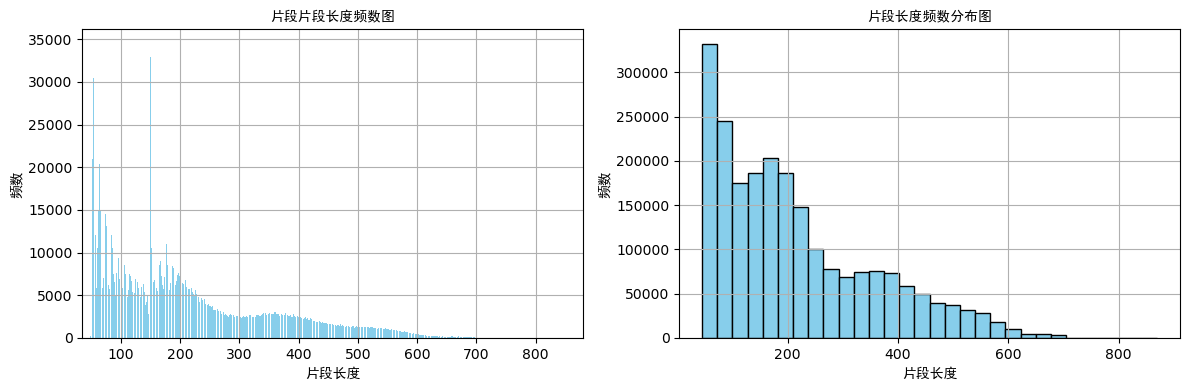

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置字体属性（假设你使用的是 Windows 系统）
font = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')  # 黑体

# 读取数据
df = pd.read_csv('fragmentLen.txt', sep='\t', header=None, names=['Fragment_Length', 'Frequency'])

# 使用数据频数扩展为实际数据点
data = df.loc[df.index.repeat(df['Frequency'])]['Fragment_Length']

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1行 2列的子图


# 绘制片段长度频数图
axs[0].bar(df['Fragment_Length'], df['Frequency'], color='skyblue', width=0.8)
axs[0].set_xlabel('片段长度', fontproperties=font)
axs[0].set_ylabel('频数', fontproperties=font)
axs[0].set_title('片段片段长度频数图', fontproperties=font)
axs[0].grid(True)

## 缩窄 x 和 y 轴的范围
axs[0].set_xlim(df['Fragment_Length'].min() - 10, df['Fragment_Length'].max() + 10)
axs[0].set_ylim(0, df['Frequency'].max() * 1.1)



# 绘制频数分布图（直方图）
axs[1].hist(data, bins=30, color='skyblue', edgecolor='black')
axs[1].set_xlabel('片段长度', fontproperties=font)
axs[1].set_ylabel('频数', fontproperties=font)
axs[1].set_title('片段长度频数分布图', fontproperties=font)
axs[1].grid(True) # 启用网格

# 调整子图布局
plt.tight_layout()
plt.show()

# Alignment filtering with MAPQ (optinal)

<font size=4 color=black><b>Some projects may require more stringent filtering on the alignment quality score

## Mapping Quality

MAPQ（Mapping Quality）是衡量比对质量的分数，表示某个比对结果被错误映射的概率。计算公式为：

* $MAPQ(x) = -10 \times \log_{10}\left(P(x \text{ is mapped wrongly})\right) = -10 \times \log_{10}(p)$

* MAPQ 值通常范围在 0 到 37、40 或 42 之间，这取决于所使用的比对工具。值越高，表示比对的置信度越高


## Filter minQualityScore

In [ ]:
samtools view -q <int> <before.bam/sam/cram> -o <after.bam/sam/cram>
# int为minQualityScore
# 推荐为2，将比对质量分数小于 2 的比对结果过滤掉

## View the reads before and after filtering

In [ ]:
# 创建一个bashrc脚本
vim filter_contrast.bashrc

In [ ]:
#在bashrc配置脚本中复制粘贴
#定义一个函数
filter_contrast() {
    before=$1
    after=$2
    output_file=$3

    echo "$before" >> "$output_file"
    samtools flagstat "$before" >> "$output_file"
    echo "--------------------" >> "$output_file"
    echo "reads with chromosome:$before" >> "$output_file"
    # samtools idxstats用于查看每条染色体的read数    
    samtools idxstats "$before" >> "$output_file"
    echo "--------------------" >> "$output_file"

    
    echo "$after" >> "$output_file"
    samtools flagstat "$after" >> "$output_file"
    echo "--------------------" >> "$output_file"
    echo "reads with chromosome:$after" >> "$output_file"
    samtools idxstats "$after" >> "$output_file"
    echo "--------------------" >> "$output_file"
}

In [ ]:
#在终端使配置脚本生效
source filter_contrast.bashrc

#在终端运行函数
filter_contrast <before.bam/sam/cram> <after.bam/sam/cram> <output_file.txt>

# Alignment filtering with Mapped Read Pairs

<font size=3 color=red ><b>注意： 我们需要过滤掉对未必对的reads。

* 否则，在生成的bed文件会出现 **.的染色体条目**（未比对的reads）。

* 在将bed文件转换成bedgraph时，因为 **.的染色体条目**与NCBI下载的chrom.sizes里的染色体名称对应不上，会出现报错。

* 可以通过bam文件生成的chrom.sizes解决上面的问题，把未必对的reads也输出到bedgraph，[详情点此](#chrom.sizes)

In [ ]:
samtools view -F 0x04 <before.bam/sam/cram> -o <after.bam/sam/cram>
# -F 0x04：-F 选项用于排除标志为 0x04 的读取，这表示排除未比对的读取。仅保留那些已成功比对到参考基因组的读取。

# Bedtools

## Bedtools introduction

<img src="./picture/046.png" width="150"/>

**Bedtools** 被誉为基因组分析中的“瑞士军刀”，提供了一系列多功能的工具，用于操作和分析基因组区间。其最广泛使用的工具可以进行**基因组算术**操作，即在基因组上执行集合理论相关的操作。

<font size=3 color=BLACK ><b>主要功能

- **交集 (Intersect):**
> 查找不同基因组数据集之间的重叠区间。
  
- **合并 (Merge):**
> 将重叠的区间合并成单一区间。
  
- **计数 (Count):**
> 统计与其他区间重叠的区间数量。
  
- **互补 (Complement):**
> 识别基因组中不与任何给定数据集的区间重叠的区域。
  
- **随机打乱 (Shuffle):**
> 随机排列基因组上的区间，以创建对照数据集。

<font size=3 color=BLACK ><b>支持的文件格式

- **BAM**: 用于比对序列的二进制文件格式。
- **BED**: 用于注释轨道的文本文件格式。
- **GFF/GTF**: 用于基因注释的文件格式。
- **VCF**: 用于变异检测数据的文件格式。

## Installing Bedtools

In [ ]:
# 如果使用 conda
conda install -c bioconda bedtools

# 如果使用 apt-get
sudo apt-get install bedtools

## Bedtools genomecov

* [Bedtools genomecov](https://bedtools.readthedocs.io/en/latest/content/tools/genomecov.html)

* 使用bedtools genomecov可以计算基因组水平上的reads **Coverage**，并生成各种各样的文件（包括Bedgraph）

<img src="./picture/049.png" width="700"/>

### chrom.sizes

使用Bedtools genomecov，如何输入格式为bed文件，则需要提供染色体长度信息文件(**chrom.sizes**)，该文件保存了基因组中的染色体名称已经对应的长度

| Chromosome | Size       |
|------------|------------|
| chr1       | 248956422  |
| chr2       | 242193529  |
| chrX       | 156040895  |
| chrY       | 57227415   |
| chrM       | 16569      |

<font size=4 color=black ><b>获取chrom.sizes文件有3种方式

<b> 1.通过bam文件获取chrom.sizes(**recommend**)

In [ ]:
 samtools view -H <bam> |  grep '^@SQ' | awk -F'\t' '{split($3,a,":"); gsub("SN:","",$2); print $2"\t"a[2]}'

---

<b> 2.从UCSC下载，适用于UCSC数据库中已有的物种

  https://hgdownload.soe.ucsc.edu/downloads.html  找到比对时的index对应的chrom.sizes下载

<font size=2 color=red ><b>注意：该方法获取的染色体格式可能与bed文件不一样

<p>例如：chrom.sizes中：</p>
<img src="./picture/051.png" width="200"/>

<p>而bed文件中：</p>
<img src="./picture/052.png" width="200"/>

* 可以发现一个使用的是裸染色体编号（如 1、2），而另一个使用的是带前缀的染色体名称（如 chr1、chr2）。为了使用 bedtools genomecov 正常运行，必须保证 BED 文件和 .chrom.sizes 文件的染色体名称一致。

* 可以通过简单的命令修改 .chrom.sizes 文件，将 chr 前缀去掉

In [ ]:
# sed 's/^chr//'：去除每一行开头的 chr 前缀
sed 's/^chr//' xxx.chrom.sizes > xxx.fixed.chrom.sizes

---

<b> 3.利用samtools进行提取

* samtools的faidx命令可以获取fasta文件中的序列长度信息，从其生成的后缀为fai的文件中可以获得chrom.sizes文件。

In [ ]:
samtools faidx xxx.fa

cut -f1,2 xxx.fa.fai > xxx.chrom.sizes

### Parameters

In [ ]:
    bedtools genomecov 

# 输入选项
    -i <bed/gff/vcf>  # 输入文件，注意BED 文件必须按染色体进行排序
    -ibam <bam>       # 输入文件是 BAM 格式。注意 BAM 文件必须按照位置排序才能正确处理

    -g <genome_file>  # 提供染色体长度信息文件(chrom.sizes)路径，不使用 -ibam 选项时必须提供。


# 输出选项
    -bg 
    # 生成BedGraph格式（适用于基因组浏览器等工具）输出
    -bga：
    # 与-bg相似，但会输出覆盖度为 0的区间。这可以帮助用户快速提取覆盖度为 0 的基因组区域
    
    -d   
    # 报告每个基因组位置的覆盖深度，使用1-based
    # 默认情况下，genomecov 报告的是一个覆盖度直方图，而使用 -d 会输出每个位置的详细深度信息
    -dz
    # 类似于 -d，但使用0-based 

    -split
    # 对BAM 或 BED12 文件中的split区间进行独立处理。
    # 在 RNA-Seq 数据中，经常会有 spliced reads（即 read 被分割成多个片段），使用此选项可以分别计算每个片段的覆盖度
    # 对于 BAM 文件，它使用 CIGAR 字符串中的 "N" 和 "D" 操作来推断覆盖区间
    # 对于 BED12 文件，它使用 BlockCount、BlockStarts 和 BlockEnds 字段

    -max <int>
    # 将覆盖度大于等于指定最大值的所有位置合并为一个区间。与 -d 和 -bg 一起使用时无效


# 特殊选项
    -scale
    # 按常数因子缩放覆盖度。每个覆盖度值将乘以此因子。这个选项常用于标准化覆盖度数据。
    
    -ignoreD
    # 在 BAM 文件中忽略局部缺失（CIGAR 字符串中的 "D" 操作），计算覆盖度时不会考虑这些删除位点

    -strand <+ or ->
    # 仅计算特定链上的覆盖度。对于 BED 文件，文件需要至少包含 6 列，链信息位于第 6 列

    -pc
    # 计算paired-end的覆盖度，仅适用于 BAM 文件

    -fs <int>
    # 强制使用指定的片段长度而不是 read 长度。仅适用于 BAM 文件

    -du
    # 对于paired-end，将两个配对的 read 看作是同一条链上的数据（用于链特异性数据分析）。仅适用于 BAM 文件

    -5 # 只会统计每个 read 在 5' 端第一个碱基的converage
    -3 # 只会统计每个 read 在 3' 端第一个碱基的converage
    # 适用于需要关注 read 起点或终点的分析场景，例如转录起始位点 (TSS) 或终止位点 (TES) 的converage


# 上传UCSC基因组浏览器选项
   -trackline
   # 在输出的 BedGraph 文件的第一行添加一个 UCSC 基因组浏览器的 track line 定义，以便将生成的文件直接上传到 UCSC 基因组浏览器作为自定义轨迹
   # 注意：如果输出文件中包含了 track line，不能直接将该文件转换为 BigWig 文件，除非手动删除第一行
 
   -trackopts 'name="My Track" visibility=2 color=255,30,30'
   # 在第一行输出中添加的 track line参数，用于自定义 UCSC 基因组浏览器的轨迹定义。

<font size=3 color=red ><b>注意事项

* 输入的 BED 文件必须按染色体进行排序

* 输入的 BAM 文件必须按位置排序

* 输入的chrom.sizes文件与BED文件染色体格式必须要

<font size=3 color=purple ><b>Example

In [ ]:
##== linux bash command ==##
#!/bin/bash

# 输入样本名
sample="sample"

# 提供染色体长度信息文件(chrom.sizes)路径。
chromSize="<xxx.chrom.sizes>"

# 定义比对到主基因组的文件路径
primary_alignment="${sample}.fragments.bed"

# 将bed转换成bedtools
bedtools genomecov -bg  -i $primary_alignment -g $chromSize > ${sample}.fragments.bedgraph

## Bedtools intersect

* bedtools intersect: This command is used to find overlapping features between two datasets

* [bedtools intersect](https://bedtools.readthedocs.io/en/latest/content/tools/intersect.html)

* <font size=3 color=red>if you have large file to intersect ,suggesting you sort your file ,and add `-sorted` option in the bedtools intersect to reduce memory, Otherwise Out of Memory will kill the program.  

<img src="./picture/054.png" width="900"/>

### Parameters

In [ ]:
    bedtools intersect

# input option
    -a <A>    # Specifies the file "A", which could be in BED/BAM/GFF/VCF format. Each feature in A is compared with B to look for overlaps
    -b <B>    # Specifies the file "B", which can be one or more BED/BAM/GFF/VCF files. You can pass multiple files or use wildcards (e.g., *.bed)
    -abam <A> # Specifically for BAM files used as "A". It compares BAM alignments in A with the features in B
    


# output option
    -ubam      # Outputs the BAM file as uncompressed. (Default:compressed BAM)
    -bed       # When using BAM input for "A", this option outputs the results in BED format. (Default:output remains in BAM format if -abam is used)

    -header    # Prints the header from the A file before printing the results. Useful for VCF, GFF, or other formats with headers.
   
    -names     # When using multiple databases (files in -b), this provides an alias for each file instead of printing a file ID.
    -filenames # Similar to -names, but shows the complete filename for each database instead of a file ID.

    -sortout   # Sorts the output hits from B for each record in A. This can be useful when you're using multiple databases in -b.



# Reporting Options
    -wa	 # Write the original entry in A for each overlap.
    -wa	 # Write the original entry in B for each overlap. (Restricted by -f and -r)

    -loj # meaning that each feature in A will be reported with its overlaps in B
    
    -wo  # Writes the original entries from both A and B plus the number of base pairs of overlap between them. (Restricted by -f and -r)
    -wao # Similar to -wo, but also reports A features with no overlap. (Restricted by -f and -r)

    -u   # Writes the original entry from A once if any overlap is found with B. (Restricted by -f and -r)
    -v   # Only reports those entries in A that have no overlap with B. (This is the opposite of -u)



# Counting Options
    -c # For each feature in A, reports the number of overlaps found in B. (Restricted -f, -F, -r, and -s)
    -C # For each feature in A, it reports the number of overlaps with each B file on separate lines. (Restricted -f, -F, -r, and -s)
 


# Overlap Requirements
    -f # Minimum overlap required as a fraction of A. (Default: is 1E-9 (1bp))
    -F # Minimum overlap required as a fraction of B. (Default: 1E-9 (1bp))

    -r # Requires reciprocal overlap between A and B, meaning that both must satisfy the minimum overlap fractions.
       # For example, if -f is 0.90 and -r is used, this requires that B overlaps at least 90% of A and vice versa.

    -e # Requires that the overlap fraction be satisfied for A or B 
       # In other words, if -e is used with -f 0.90 and -F 0.10 this requires that either 90% of A is covered OR 10% of B is covered. 
       # Without -e, both fractions would have to be satisfied.



# Strand-Specific(+-链) Options
    -s # Enforces "strandedness", meaning that only overlaps on the same strand are considered. (Default: strand is ignored)
    -S # Enforces "opposite strandedness", meaning only overlaps on the opposite strand are reported.



# Special Options for BAM Files
    -split # Treat “split” BAM (having an “N” CIGAR(Skipped region)operation) or BED12 entries as distinct BED intervals



# performance optimization
    -sorted # For very large B files, invokes a "sweeping" algorithm that requires the input to be sorted by chromosome and position 
            # (e.g., sort -k1,1 -k2,2n).
            # This reduces memory usage for large files.  
   
    -g <genome file> # pecifies a genome file that defines the expected chromosome order for use with the -sorted option.

    -nobuf # Disables buffered output, meaning each line is printed immediately. 
           # This can slow down large outputs but is useful when output is processed line-by-line.

    -iobuf <size> # Sets the size of the read buffer (in bytes). 
                  # Supports suffixes like K, M, or G . 
                  # Currently has no effect with compressed files.

# Convert BAM to BED

## 0-base or 1-base？

* 在**0-based**坐标系中，坐标的计数从 0 开始。第一个碱基被编号为 0。在这种坐标系中，区间的起始位置包含，而**结束位置为非包含**（半开放区间）

    * 例如，在 0-based 坐标系中，区间 1000-1050 表示从第 1001 个碱基开始，到第 1050 个碱基结束（不包含第 1050 个碱基），即 1-based 坐标的 1001-1050。

    * 常见使用 0-based 坐标系的文件格式包括**BED**和**BAM**

* 在**1-based**坐标系中，坐标的计数从 1 开始。它表示基因组中的位置时，第一个碱基被编号为 1

    * 例如，在 1-based 坐标系中，位置 100 表示第 100 个碱基

    * 常见使用 1-based 坐标系的文件格式包括**VCF**和**GFF**

  

## Strcture of BED

### 基本 BED 格式（BED3）

| Chromosome | Start  | End  |
|------------|----------------|--------------|
| chr1       | 1000           | 1050         |
| chr2       | 2000           | 2050         |
| chr3       | 3000           | 3050         |

* **chrom**：染色体名称。
* **start**：区间的起始位置（0-based）。
* **end**：区间的结束位置（0-based）。

### 扩展 BED 格式（BED6）

| Chromosome | Start | End | Name | Score | Strand |
|------------|----------------|--------------|------|-------|--------|
| chr1       | 1000           | 1050         | gene1| 100   | +      |
| chr2       | 2000           | 2050         | gene2| 200   | -      |
| chr3       | 3000           | 3050         | gene3| 300   | +      |

* **name**：区间的名称或ID（如基因名称、序列ID等）。
* **score**：得分（通常为0-1000之间的整数），可以表示某种权重或置信度。
* **strand**：链方向，+ 表示正链，- 表示负链。

### 完整 BED 格式（BED12）
对于描述更复杂的区间，如包含多个“块”（block）的区间（如跨多个外显子的转录本）

| Chromosome | Start Position | End Position | Name  | Score | Strand | Thick Start | Thick End | Item RGB | Block Count | Block Sizes | Block Starts |
|------------|----------------|--------------|-------|-------|--------|-------------|-----------|----------|-------------|-------------|--------------|
| chr1       | 1000           | 1050         | gene1 | 100   | +      | 1000        | 1050      | 255,0,0  | 2           | 50,30       | 0,70         |
| chr2       | 2000           | 2100         | gene2 | 200   | -      | 2000        | 2100      | 0,255,0  | 3           | 100,50,30   | 0,100,170    |
| chr3       | 3000           | 3150         | gene3 | 300   | +      | 3000        | 3150      | 0,0,255  | 1           | 150         | 0            |


* **thickStart 和 thickEnd**：表示区间中加粗显示的部分（例如 CDS 区间）。
* **itemRgb**：表示颜色信息，用于可视化（R,G,B格式）。
* **blockCount**：区间中“块”的数量（如外显子数量）。
* **blockSizes**：每个“块”的大小，以逗号分隔。
* **blockStarts**：指示每个“块”（如外显子）在基因组上的起始位置。

### BEDPE 格式
BEDPE 格式（BED Paired-End）是用来描述paired-end reads在基因组上位置的格式，它包含两个读取对的起始和结束位置等信息。通常用于分析测序数据中成对读取的配对和片段长度等。

| Chromosome1 | Start1 | End1 | Chromosome2 | Start2 | End2 | Name  | Score | Strand1 | Strand2 |
|-------------|--------|------|-------------|--------|------|-------|-------|---------|---------|
| chr1        | 1000   | 1050 | chr1        | 2000   | 2050 | gene1 | 100   | +       | -       |
| chr2        | 3000   | 3050 | chr2        | 4000   | 4050 | gene2 | 200   | -       | +       |
| chr3        | 5000   | 5050 | chr3        | 6000   | 6050 | gene3 | 300   | +       | -       |


* <b>得分列默认使用两端比对质量的最小值

### CIGAR 字符串
有些BED 文件的第七列会纯在一个CIGAR（Compact Idiosyncratic Gapped Alignment Report） 字符串，是一种用于描述比对过程中序列与参考基因组之间关系的格式。CIGAR 字符串以紧凑的方式表示了每个比对中存在的匹配、缺失、插入等操作
<br>
<br>

- **M**: 匹配（Match）。表示序列和参考序列在这一段上的匹配或者不匹配碱基。通常在 DNA-seq 中仅表示匹配碱基，而在 RNA-seq 中可能还表示不匹配。
- **I**: 插入（Insertion）。表示序列相对于参考基因组有插入碱基。
- **D**: 缺失（Deletion）。表示序列相对于参考基因组有缺失碱基。
- **N**: 跳过区域（Skipped region）。通常用于 RNA-seq 数据，表示剪接事件，即读取的序列跳过了参考基因组中的一段内含子。
- **S**: 软剪切（Soft clipping）。表示读取的序列中有一部分没有比对到参考基因组（这些碱基仍保留在比对的序列中）。
- **H**: 硬剪切（Hard clipping）。与软剪切类似，但这些碱基在输出文件中被完全删除，不再保留。
- **P**: 填充（Padding）。用于在某些比对中添加填充符号（一般用于对齐中间的空隙）。
- **=**: 序列匹配（Sequence match）。表示序列与参考基因组完全匹配的部分。
- **X**: 序列不匹配（Sequence mismatch）。表示序列与参考基因<br>
<br>
<font size=4 color=red ><b>例如
<br>
<font size=3 color=black ><b><div style="text-align: center;">10M1I5M1D4M
<br>
<br>

>M表示前 10 个碱基与参考基因组匹配

>1I表示接下来有 1 个碱基是插入的

>5M表示接下来的 5 个碱基与参考基因组匹配

>1D表示在参考基因组中缺失了 1 个碱基，这个碱基在比对的序列中不存在

>4M表示最后的 4 个碱基与参考基因组匹配组不匹配的部分。


## Convert BAM to BED with bedtools

bedtools bamtobed 用于将 BAM 文件转换为 BED 格式。

In [ ]:
bedtools bamtobed -i sample.bam > sample.bed -bedpe

* 默认的输出格式为**BED6**格式 ，如果为paired-end reads，则把paired ends 分开几行输出，而不在一行
<br>
<br>
* 如果为paired-end reads，可以选择 **-bedpe**来方便后面的过率，对于生成的 BEDPE 文件。
* **-mate1**：当使用 **-bedpe** 时，-mate1 参数确保输出的 BEDPE 条目中的第一对片段（第一个 "block"）始终是 read 1
* **不使用-mate1**：

> **第一个片段（block1)** 通常对应于在基因组中较小的起始位置的片段（即，Start1）

> **第二个片段（block2)** 则对应于较大的起始位置的片段（即，Start2）
<br>
<br>
* **-bed12**：输出为BED12格式
* **-color**：指定用于 BED12 格式中的颜色，使用 R,G,B 字符串，默认颜色为 (255,0,0)，即红色，在可视化时，此选项可以用来定义显示的颜色
<br>
<br>
* **-cigar**：将 CIGAR 字符串添加为 BED 文件的第七列。
<br>
<br>
* **-split**：如果 BAM 文件中包含有“分割”的比对（例如，跨多个外显子或重复区域的比对），此选项会将这些比对拆分成多个单独的 BED 条目
* **-splitD**：用于将 BAM 文件中的比对按照 N 和 D 的 CIGAR 操作符进行拆分，并将每个拆分后的片段作为单独的 BED 记录
<br>
<br>
* **-tag**：使用其他数值类型的 BAM 标签作为 BED 文件中的得分。默认情况下，BED 文件使用比对质量作为得分。不允许与 BEDPE 格式一起使用
<br>
<br>
* **-ed** 参数用于将 BAM 文件中的编辑距离（即 NM 标签）（即比对过程中引入的错配、插入和删除的总数）作为生成的 BED 文件的得分列的值。


## Keep the read pairs that are on the same chromosome and fragment length less than 1000bp（optial）

<font size=3 color=red ><b>对于Paired-End

需进一步过滤并保留位于相同染色体上且片段长度小于 1000bp 的read pairs

<font size=3 color=red ><b>bowtie2设置以下parameter可以逃过此步：

--no-discordant together with -I 10 -X 700 ensures that the fragment is 10-700bp long which will also exclude read pairs that are on the different chromosome.

<font size=3 color=red ><b> Code

In [ ]:
awk '$1==$4 && $6-$2 < 1000 {print $0}' sample.bed > sample.clean.bed 
# $1==$4：表示过滤掉那些不在同一染色体上的读取对（即第一列和第四列的染色体名称必须相同）
# && 的作用是 仅当前一个命令成功执行（即返回状态码为 0）时，才会执行下一个命令。
# $6-$2 < 1000：过滤条件，表示保留片段长度小于 1000bp 的读取对。第六列和第二列分别代表片段末端和起始位置，计算差值即为片段长度。

## Extract the fragment related columns

In [ ]:
cut -f 1,2,6 sample.bed | \
# cut 命令用于从文件中提取指定列。
# -f 1,2,6 表示提取第 1、2 和 6 列
#第 1 列：代表染色体（Chromosome）。
#第 2 列：代表较小的起始位置的片段（Start1）。
#第 6 列：代表较大的起始位置的片段（End2）


sort -k1,1 -k2,2n -k3,3n > sample.fragments.bed
#这个命令将对数据进行多级排序：
#第一步：按照第 1 列（-k1,1）进行排序。这一步按字母顺序进行。
#第二步：在第 1 列相同的情况下，按第 2 列（-k2,2n）进行排序。这一步按数字大小排序，确保数值上较小的排在前面。
#第三步：如果第 1 列和第 2 列都相同，再按第 3 列（-k3,3n）进行排序，也按数字大小排序。

<font size=3 color=red ><b>注意：这里输入的bed格式为bedpe格式，否则第1，2，6列不对应，需要根据情况更改。

## Evaluate the reproducibility of replicate samples(optial)

为了评估不同重复样本之间以及不同条件下的重现性，首先将基因组分成**500 bp** 的窗口（bin），然后计算每个窗口中**read count的 log2 转换值**。接着，计算每对重复样本之间的 **Pearson 相关性**，并通过层次聚类的方式展示。
________________

* **如何计算每个窗口的reads数？**

  * 计算每个read中点所在的窗口中心位置
     
     * 计算每个 Read 的中点
   
       $\text{midpoint}_i = \frac{\text{start}_i + \text{end}_i}{2}$

     * 计算每个中点所在的窗口索引
   
       $\text{window\_index}_i = \text{floor}\left(\frac{\text{midpoint}_i}{\text{binLen}}\right)$

       $\text{floor}$:向下取整

    * 计算该索引窗口的起始位置

       $\text{window\_start}_i = \text{window\_index}_i \times \text{binLen}$

    * 计算该索引窗口的中心位置
   
      $\text{window\_center}_i = \text{window\_start}_i + \frac{\text{binLen}}{2}$

     * 把上面公式合在一起

       $\begin{align*}\text{window\_center}_i & = \left( \left\lfloor \frac{\frac{\text{start}_i + \text{end}_i}{2}}{\text{binLen}}\right\rfloor \times \text{binLen} \right) + \frac{\text{binLen}}{2} \end{align*}$

  * 对同一条染色体上相同的$\text{window\_center}_i$ 计数为该窗口的read count
_________________

- **Pearson 相关性系数**（Pearson Correlation Coefficient, PCC）用于衡量两个变量之间的线性相关性，值的范围在 -1 到 1 之间：

   - **1** 表示完全正相关，两个变量同步变化。
   - **-1** 表示完全负相关，一个变量增加时，另一个减少。
   - **0** 表示无线性相关性。
<br>



- **Pearson计算公式**

$$
r = \frac{{\sum (X_i - \overline{X})(Y_i - \overline{Y})}}{{\sqrt{\sum (X_i - \overline{X})^2} \cdot \sqrt{\sum (Y_i - \overline{Y})^2}}}
$$

$ X_i $ 和 $ Y_i $ 是两个变量的值。

$ \overline{X} $ 和 $ \overline{Y} $ 是两个变量的均值。
_________________

<b>1.计算每个窗口的reads数(termnal)

In [ ]:
#定义窗口大小为 500 bp。
binLen=500

#计算每个read中点所在的窗口中心位置。 $1是染色体位置， $2是片段的起始位置，$3是终止位置。
awk -v w=$binLen '{print $1, int(($2 + $3)/(2*w))*w + w/2}' sample.fragments.bed | \

# 对片段的染色体位置（k1）和所在的窗口中心位置（k2）进行排序。
sort -k1,1V -k2,2n | \

# 去除重复，并对重复行进行计数（每个窗口中有多少个片段），计数放在第一列
uniq -c | \

# 按（\t）分割输出染色体位置($2),窗口中心位置($3),所在计数($1)
awk -v OFS="\t" '{print $2, $3, $1}'| \

# 对染色体位置(k1)和窗口中心位置(k2)进行排序并输出
sort -k1,1V -k2,2n > sample.fragmentsCount.bed

<b>2. 热图显示Pearson相关性（python）

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.colors as mcolors

# 读取并合并多个样本的片段计数数据
frag_count = None

# 输入样本名
sample_list=['KCHIP2','KCHIP2-OE']

# 遍历样本列表,并把所有样本都整合在一个表格内frag_count
for sample in sample_list:  
    frag_count_tmp = pd.read_csv(f"./fragmentsCount/{sample}.fragmentsCount.bed", 
                                 sep="\t", header=None, 
                                 names=["chrom", "bin", sample],
                                dtype={"chrom": str, "bin": int, sample: int})
    
    if frag_count is None:
        frag_count = frag_count_tmp
    else:
        frag_count = pd.merge(frag_count, frag_count_tmp, on=["chrom", "bin"], how="outer")

frag_count

,chrom,bin,KCHIP2,KCHIP2-OE
0,.,250,2455099.0,2331710.0
1,1,250,NaN,4.0
2,1,4750,1.0,NaN
3,1,5250,NaN,3.0
4,1,5750,NaN,1.0
...,...,...,...,...
3372733,Y,3302750,NaN,1.0
3372734,Y,3306250,NaN,1.0
3372735,Y,3306750,NaN,2.0
3372736,Y,3307750,1.0,1.0


In [4]:
# 进行log2(x + 1)转换
frag_count_data = frag_count.drop(columns=["chrom", "bin"]).apply(lambda x: np.log2(x + 1))  # 添加1以防止取log时出现负无穷

# 计算Pearson相关系数矩阵
corr_matrix = frag_count_data.corr(method='pearson')


corr_matrix

,KCHIP2,KCHIP2-OE
KCHIP2,1.0000,0.4796
KCHIP2-OE,0.4796,1.0000


<b>Visualization

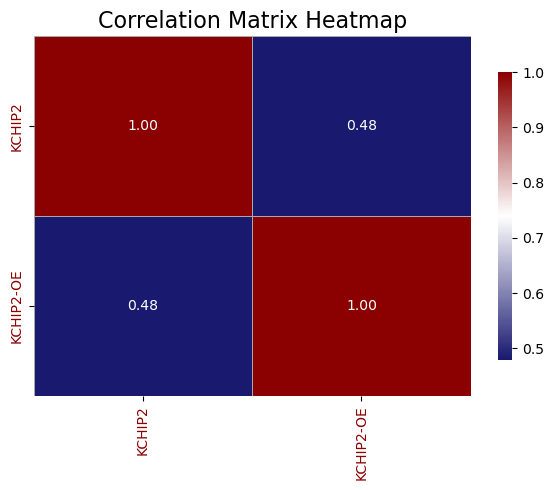

In [6]:
# 创建热图
plt.figure(figsize=(6, 5))

# 定义颜色映射：从深蓝到白色再到深红
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ["midnightblue", "white", "darkred"])

# 使用 seaborn 绘制热图
sns.heatmap(corr_matrix, 
            annot=True,  #表示在单元格内显示相关系数数值
            fmt=".2f",   #控制显示数值的格式。".2f" 表示保留两位小数
            cmap=cmap,   #颜色
            linewidths=0.5, 
            linecolor='darkgray', 
            cbar_kws={"shrink": 0.8})  #用于传递与颜色条的参数。这里的 {"shrink": .8} 颜色条的高度将缩小为原来的 80%

# 设置热图标题
plt.title("Correlation Matrix Heatmap", fontsize=16)

# 设置x轴和y轴的标签旋转角度
plt.xticks(rotation=90, fontsize=10, color='darkred')
plt.yticks(fontsize=10, color='darkred')

# 显示图像
plt.tight_layout()
plt.show()

# Strcture of GFF3 and VCF(optial reading)

## Strcture of GFF3

* GFF3 (General Feature Format Version 3)是一种用于描述基因组**feature**（如基因、外显子、转录本等）的文本格式。它能够有效地表示生物序列中的不同特征

* [GFF3](https://gmod.org/wiki/GFF3)

| seqid | source | type | start | end   | score | strand | phase | attributes                  |
|-------|--------|------|-------|-------|-------|--------|-------|-----------------------------|
| chr1  | .      | gene | 1000  | 5000  | .     | +      | .     | ID=gene1;Name=Gene1          |
| chr1  | .      | mRNA | 1000  | 5000  | .     | +      | .     | ID=mRNA1;Parent=gene1        |
| chr1  | .      | exon | 1000  | 2000  | .     | +      | 0     | ID=exon1;Parent=mRNA1        |
| chr1  | .      | exon | 3000  | 5000  | .     | +      | 0     | ID=exon2;Parent=mRNA1        |


* **seqid**: name of the chromosome or scaffold

* **source**: 生成此功能的程序名称，或数据源（数据库或项目名称）(. 表示未知)

* **type**: feature类型，例如 gene、mRNA、exon

* **start**: feature在序列中的起始位置(1-based)

* **end**: feature在序列中的结束位置(1-based)

* **score**: feature得分（数值或 . 表示缺失）。

* **strand**: 表示链方向，+ 表示正链，- 表示负链。

* **phase**: 编码相位。0"、"1 "或 "2 "中的一个。 0 "表示特征的第一个碱基是密码子的第一个碱基，"1 "表示第二个碱基是密码子的第一个碱基，以此类推

* **attributes**: feature的附加属性，如 ID、Parent 等。

## Strcture of VCF

* VCF (Variant Call Format) 是一种用于存储变异信息（如 SNP、插入、缺失等）的文本格式，通常用于表示基因组序列的变化。

* [VCF](https://samtools.github.io/hts-specs/VCFv4.5.pdf)

| #CHROM | POS  | ID  | REF  | ALT  | QUAL | FILTER | INFO        | FORMAT   | SAMPLE1   | SAMPLE2   |
|--------|------|-----|------|------|------|--------|-------------|----------|-----------|-----------|
| chr1   | 1000 | .   | A    | G    | 99   | PASS   | DP=20       | GT:DP    | 0/1:10    | 0/0:20    |
| chr1   | 1500 | .   | C    | T    | 99   | PASS   | DP=30       | GT:DP    | 0/1:15    | 0/1:15    |


- **#CHROM**: 染色体名称。

- **POS**: 变异在染色体上的位置（1-based）。

- **ID**: 变异的标识符（如果没有则为 `.`）。

- **REF**: 参考序列中的碱基。

- **ALT**: 变异碱基（可以有多个）。

- **QUAL**: 变异质量分数。

- **FILTER**: 过滤信息，表示变异是否通过了质量过滤。

- **INFO**: 附加信息字段，如覆盖深度 `DP`。

- **FORMAT**: 样本信息的格式。
   
    - **GT**: 基因型（Genotype），表示样本的等位基因组合，例如 0/0（纯合参考）、0/1（杂合）或 1/1（纯合变异）。
    
    - **DP**: 覆盖深度（Depth of Coverage），表示该位置的测序读取数量。
    
    - 其他信息：可能还包括如 **GQ**（基因型质量）、**PL**（后验概率）等。

- **SAMPLE1**：表示第一个样本的信息，对应FORMAT字段定义

- **SAMPLE2**: 表示第二个样本的信息，对应FORMAT字段定义

# Convert BED to Bedgraph

* 在CUT&Tag和CUT&RUN中的Quantification of peaks需要Bedgraph文件作为输入

## Strcture of bedgraph

| Chromosome | Start | End   | Coverage |
|------------|-------|-------|----------|
| chr1       | 1000  | 2000  | 5        |
| chr1       | 2000  | 3000  | 8        |
| chr2       | 1500  | 2500  | 10       |


* **start**: 基因组上**区间**的起始坐标。

* **end**: 基因组上**区间**的结束坐标。

* **Coverage**: 表示该区域的平均覆盖度。

* Calculate **Coverage**：

$$\text{Coverage} = \frac{\text{总测序碱基数}}{\text{目标基因组区域的碱基数}}$$


    总测序碱基数：该区域测序 reads 的总碱基数（测序深度乘以读长）。
    
    目标基因组区域的碱基数：该区域的碱基总长度。


* Example of calculate Coverage  ：

  假设：
    * 该区域存在50 条reads
    * 每条 reads 长度为 150 bp
    * 目标基因组区域长度为 1000 bp

$$
\text{Coverage} = \frac{50 \times 150}{1000} = 7.5
$$


## Use the E.coli genome to normalize data (optional/recommended)(step2)

* [Click here to view step 1](#Use-the-E.coli-genome-to-normalize-data-(optional/recommended)(step1))

* Using tools：[Bedtools genomecov](#Bedtools-genomecov)

<font size=4 color=black ><b>Step 2 Spike-in calibration 

**假设**：对于每个使用相同数量细胞的样本，比对到主基因组和 E. coli 基因组的片段比例应该是相同的。

* 通过对E. coli 基因组作为内参对主基因组进行**calibration**

* 缩放因子 $ S $的定义：为了避免归一化数据中的小数，使用一个常数 $𝐶$（通常是 10,000）来定义的

$$S = \frac{C}{\text{比对到 } E. coli \text{ 基因组的片段数}}$$

* 归一化的计算公式为：

$$\text{Normalized coverage} = (\text{primary genome coverage}) \times S$$

<font size=3 color=black ><b>Normalize data 

* 根据比对到Ecoil的reads计算测序深度,其输出到**sample.Ecoil.seqDepth**文件

* 计算缩放因子

* 使用[Bedtools genomecov](#Bedtools-genomecov)工具对文件就行标准化

In [ ]:
##== linux bash command ==##
#!/bin/bash

# 输入样本名
sample="sample"

# 提供染色体长度信息文件(chrom.sizes)路径。
chromSize="<xxx.chrom.sizes>"

# 定义比对到E.COli的文件路径
Ecoil_alignment="Ecoil/<sample.bam/sam/cram>"

# 定义比对到主基因组的文件路径
primary_alignment="${sample}.fragments.bed"

# 创建bedgraph文件夹用于输出
mkdir -p ./bedgraph

# samtools view查看比对成功的reads（-F 0x04）
# wc -l 执行后返回的行数，即比对成功的 reads 数量
seqDepthDouble=$(samtools view -F 0x04 $Ecoil_aligement | wc -l)

# 测序深度等于 reads 数量除以 2（假设是双端测序）
seqDepth=$((seqDepthDouble / 2))

# 输出测序深度到sample.Ecoil.seqDepth文件
echo $seqDepth > Ecoil/${sample}.Ecoil.seqDepth


# 检查seqDepth（测序深度）是否大于 1，大于1后进行以下操作
if [[ "$seqDepth" -gt "1" ]]; then

    # 计算缩放因子S
    # bc -l 会加载数学库，从而允许进行浮点数运算并支持一些数学函数（如正弦、余弦、对数等）
    # 此外，它还会将默认的小数位数设为 20 位，这样可以进行更精确的浮点计算。
    scale_factor=$(echo "10000 / $seqDepth" | bc -l)

    # 使用echo把缩放因子S打印到终端
    echo "Scaling factor for $sample is: $scale_factor!"
    
    # 使用bedtools生成归一化的bedgraph文件 
    bedtools genomecov -bg -scale $scale_factor -i $primary_alignment -g $chromSize > bedgraph/${sample}.fragments.normalized.bedgraph

fi

# Quantification of peaks

## macs2

* **Software installation:** `conda install -y macs2`

## SEACR(For CUT&Tag and CUT&RUN)

* 在ChIP-seq数据分析中，常用的方法是**peak calling**，通过比较目标ChIP-seq信号与背景噪音来识别基因组中信号富集的区域。这类算法通常采用泊松分布或负二项分布模型来衡量信号与背景的差异。然而，由于ChIP-seq实验通常测序较深，背景噪音较高，因此大多数ChIP-seq峰值识别算法优化时更注重高灵敏度，以便从噪音中区分出信号。

* CUT&Tag和CUT&RUN 的数据背景噪音比ChIP-seq低得多。该数据的低背景和较少的读取深度使得传统的峰值识别算法容易受到误报的影响，从而降低了精确性

* 针对CUT&Tag和CUT&RUN，峰值识别算法需要具备较高的特异性，因此使用**稀疏富集分析工具（SEACR）**


   *  SEACR requires **bedGraph** files from **paired-end** sequencing as input

   *  If you have **normalized fragment counts with the E. coli read count**, we set the normalization option of SEACR to **non**

      Otherwise, the **norm** is recommended. 

### SEACR Theory

* [SEACR](<https://epigeneticsandchromatin.biomedcentral.com/articles/10.1186/s13072-019-0287-4>)

* 首先将来自目标抗体和 IgG 对照实验数据解析为**signal blocks**(连续、非零读数的reads)

* The signal in each block is calculated by **summing read counts**

* 通过绘制目标signal blocks与 IgG signal blocks的比例图，确定目标signal blocks与IgG signal blocks比例达到最大值的阈值；然后过滤掉未达到阈值的目标signal blocks

* 同时，SEACR还过滤掉与IgG信号重叠的目标signal blocks，以去除可能的假阳性信号。

<img src="./picture/047.png" width="700"/>

### SEACR 选项

为了简化用户的分析流程，SEACR 仅提供了两个主要的选项

* IgG数据集或全局阈值：

   * **IgG数据集**：默认选项，用户可以提供 IgG作为对照样本数据集，用于去除背景噪声。**通常建议使用这种方法**。

   * **全局阈值**：如果用户没有 IgG 对照样本，SEACR 允许使用全局阈值进行峰值调用。

* stringent pattern and relaxed pattern：

   * **stringent**：默认选项，它设定一个阈值，使得能够保留最大比例的目标信号块，而对照 IgG 信号块尽可能被排除。这种模式强调高精度，通常用于信号较为强烈的实验。
   
   * **relaxed**：这种模式的阈值较为灵活，设定在目标信号比例曲线的最高点和“膝点”（曲线开始急剧变化的地方）之间的中间位置。这样可以检测到更多的峰值，但可能包含更多噪声。
 
  <img src="./picture/053.png" width="700"/>

### SEACR安装与用法

* [SEACR GitHub](https://github.com/FredHutch/SEACR)

* SEACR是一个sh脚本，其1.3版本下载：`wget https://raw.githubusercontent.com/FredHutch/SEACR/master/SEACR_1.3.sh`

* SEACR需要R的支持，其1.3的R脚本下载：`wget https://github.com/FredHutch/SEACR/blob/master/SEACR_1.3.R`

* **其SEACR的R脚本需要和SEACR的sh脚本需要放在同一文件下才能正常运行**

* SEACR运行：`bash SEACR_1.3.sh <signalFile> <controlFile> <norm> <stringency> <outputPrefix>`

  * **signalFile**: 实验样本的 BEDgraph 文件。

  * **controlFile**:

     * 有对照组：对照样本的 BEDgraph 文件

     * 无对照组：使用介于 0 和 1 之间的全局阈值 n，选择信号最高的前 n% 的区域作为峰值。（推荐0.01）

  * **norm**: 归一化处理，有两个选项：

     * **non**: 不进行归一化处理。

     * **norm**: 进行归一化处理，并从信号中减去对照噪声。

  * **stringency**: 指定严格性阈值，两个选项：

     * **relaxed**: 更宽松的峰调用标准，允许检测到更多峰。

     * **stringent**: 严格的标准，检测到的峰数量相对更少，但精确度更高。

  * **outputPrefix**: 输出文件的前缀，结果将输出为 .bed 格式。

<b>Example

In [ ]:
##== linux bash command ==##
#!/bin/bash

# creat file to store resuts
mkdir -p SEACR

# path of SEACR
seacr="SEACR_1.3.sh"

# samples name
samples=(KCHIP2 KCHIP2-OE)

# path of controlFile
controlFile="${samples[0]}.fragments.bedgraph"

# define Top peaks threshold
peaks=(0.01 0.05)

# traversa samples
for sample in "${samples[@]}"
do
   # path of samples
   signalFile="${sample}.fragments.bedgraph"

   # traversa peaks
   for peak in "${peaks[@]}"
   do
   
       # top peaks
       bash "$seacr" "$signalFile" "$peak" norm stringent "SEACR/${sample}_seacr_top${peak}.peaks"

       # Report with green text
       echo -e "\e[32m${signalFile}_top${peak} is done\e[0m"
    done

done


# KCHIP2 as background to calculate KCHIP2-OE peaks
bash "$seacr" "${samples[1]}.fragments.bedgraph" "$controlFile" norm stringent "SEACR/${samples[1]}_seacr_${samples[0]}ascontrol.peaks"

# Report final result with green text
echo -e "\e[32mBackground peak calculation for ${samples[1]} using ${samples[0]} as control is done.\e[0m"

### SEACR网页版

* 作者开发了 [SEACR 网络服务器](http://seacr.fredhutch.org)用于随时随地地分析CUT&Tag和CUT&RUN 数据。 

* 该网络服务器接受最大 500 Mb 的bedgraph文件作为输入，用户可以切换所需的参数（归一化或非归一化模式、严格或宽松模式），在运行过程中报告进度，并提供可下载的包含结果的 BED 文件链接。 

<img src="./picture/048.png" width="900"/>

## Stracture of SEACR bed file


<font size=3 color=purple><b>Example SEACR BED Entry：

| Chromosome | Start      | End        | total signal | max signal | max signal region              |
|------------|------------|------------|-------|------------|--------------------------|
| 1          | 216897094  | 216897762  | 816   | 2          | 1:216897348-216897496     |
| 1          | 217018188  | 217018946  | 919   | 2          | 1:217018442-217018890     |
| 1          | 217197126  | 217198022  | 902   | 2          | 1:217197517-217197523     |

<br>
<br>
<br>

<font size=3 color=purple><b>SEACR BED File Structure:


| Column Number | Field          | Description                                                   |
|---------------|----------------|---------------------------------------------------------------|
| 1             | Chromosome      | The chromosome where the peak is located (e.g., `1`, `chrX`)  |
| 2             | Start           | Start position of the peak (0-based, inclusive)               |
| 3             | End             | End position of the peak (0-based, exclusive)                 |
| 4             | total signal    | Total signal contained within denoted coordinates             |
| 5             | max signal      | Maximum bedgraph signal attained at any base pair within denoted coordinates  |
| 6             | max signal region | region representing the farthest upstream and farthest downstream bases within the denoted coordinates that are represented by the maximum bedgraph signal, formatted as `chr:start-end` |

## Number of peaks

<font size=4 color=blue><b>通过读取生成的bed文件，获取不同样本，不同peak类型的数目（python）

In [26]:
##== Python command ==##
import pandas as pd
import os

# Define the sample list
sampleList = ["KCHIP2","KCHIP2-OE"]

# Define the types of peaks to analyze
peakType = ["top0.01", "top0.05", "KCHIP2ascontrol"]

# Initialize empty lists to store peak count (peakN), peak width
peakN = []
peakWidth = []


# Traverse over the sample list
for sample in sampleList:
    # Traverse over the peakType
    for ptype in peakType:
        
        # Construct the peak file path 
        file_path = os.path.join("SEACR", f"{sample}_seacr_{ptype}.peaks.stringent.bed")

        # Check if the file exists to avoid errors
        if os.path.exists(file_path):
        
            # Read the peak file (without headers) 
            peakInfo = pd.read_csv(file_path, sep="\t", header=None, low_memory=False)

            # calculate the width of each peak
            # v3(end)-v2(start)
            peakInfo['width'] = abs(peakInfo[2] - peakInfo[1])  

            # Store the peak count and type information
            peakN.append({
                "sample": sample,  # sample type
                "peakType": ptype,  # Peak type (control or top0.01)
                "peakN": peakInfo.shape[0]  # Number of peaks (rows in the dataframe)
            })

            # Store the peak width information
            for width in peakInfo['width']:
                peakWidth.append({
                    "sample": sample,  
                    "peakType": ptype,  
                    "width": width  
                })
        else:
            # 输出文件未找到的消息
            print(f"File not found: {file_path}")


# Convert the peakN and peakWidth lists into pandas DataFrames for further analysis or saving
peakN_df = pd.DataFrame(peakN)[['sample', 'peakType', 'peakN']]
peakWidth_df = pd.DataFrame(peakWidth)

File not found: SEACR\KCHIP2_seacr_KCHIP2ascontrol.peaks.stringent.bed


In [28]:
##== Python command ==##
# check the peak count
peakN_df

,sample,peakType,peakN
0,KCHIP2,top0.01,9294
1,KCHIP2,top0.05,46527
2,KCHIP2-OE,top0.01,34989
3,KCHIP2-OE,top0.05,175082
4,KCHIP2-OE,KCHIP2ascontrol,7089


---

<font size=4 color=blue><b>Visualization of peak count

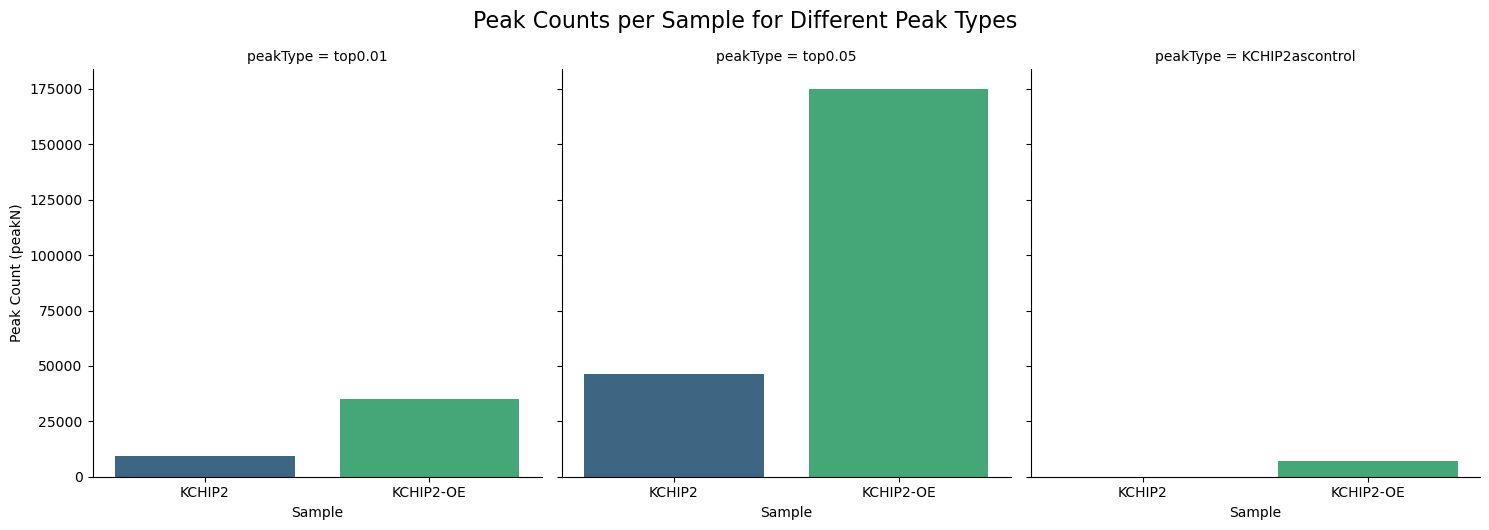

In [32]:
##== Python command ==##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid to separate plots by 'peakType'
g = sns.FacetGrid(peakN_df, col='peakType', height=5, aspect=1)

# Create a barplot for each subplot with sample on x-axis and peakN on y-axis
g.map(sns.barplot, 'sample', 'peakN', order=peakN_df['sample'].unique(), hue=peakN_df['sample'], palette="viridis")

# Add labels and title for the entire plot
g.set_axis_labels('Sample', 'Peak Count (peakN)')
g.fig.suptitle('Peak Counts per Sample for Different Peak Types', fontsize=16, y=1.05)

# Show the plot
plt.show()

In [34]:
peakWidth_df

,sample,peakType,width
0,KCHIP2,top0.01,597
1,KCHIP2,top0.01,690
2,KCHIP2,top0.01,848
3,KCHIP2,top0.01,797
4,KCHIP2,top0.01,952
...,...,...,...
272976,KCHIP2-OE,KCHIP2ascontrol,1007
272977,KCHIP2-OE,KCHIP2ascontrol,420
272978,KCHIP2-OE,KCHIP2ascontrol,615
272979,KCHIP2-OE,KCHIP2ascontrol,487


---

<font size=4 color=blue><b>Visualization of peak width

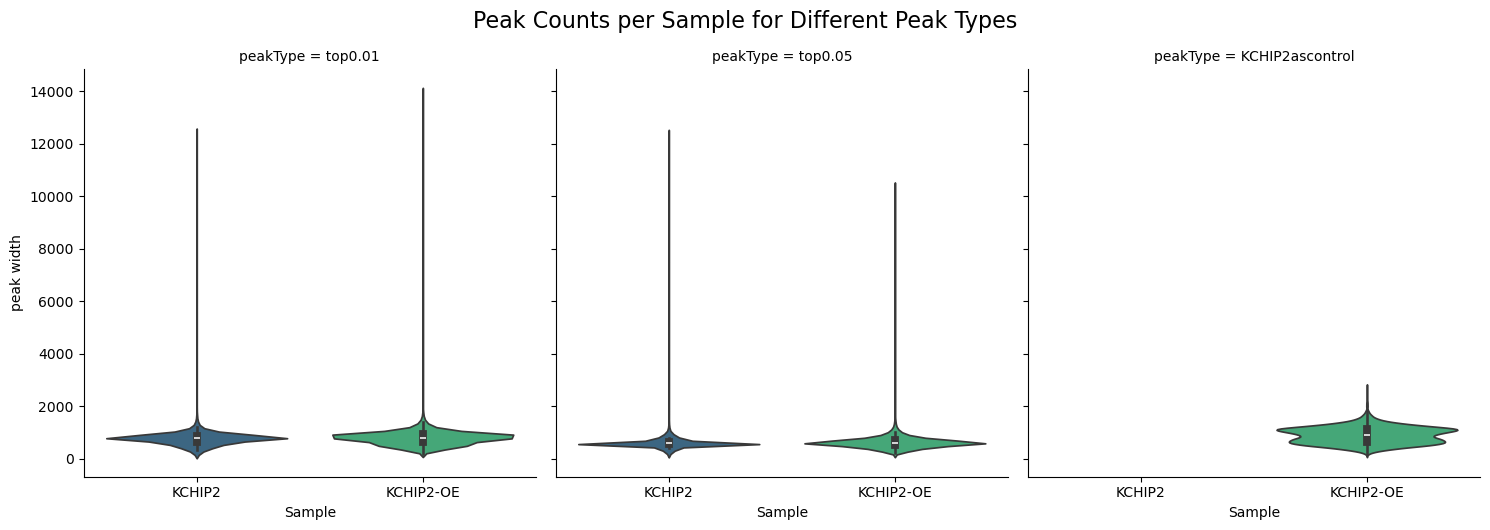

In [38]:
##== Python command ==##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid to separate plots by 'peakType'
g = sns.FacetGrid(peakWidth_df, col='peakType', height=5, aspect=1)

# Create a barplot for each subplot with sample on x-axis and peakN on y-axis
g.map(sns.violinplot, 'sample', 'width', order=peakWidth_df['sample'].unique(), hue=peakWidth_df['sample'], palette="viridis")

# Add labels and title for the entire plot
g.set_axis_labels('Sample', 'peak width')
g.fig.suptitle('Peak Counts per Sample for Different Peak Types', fontsize=16, y=1.05)

# Show the plot
plt.show()

## Comparing the same peaks on replicate sample data sets(optial)

* Using tools: [Bedtools intersect](#Bedtools-intersect)

<font size=4 color=blue><b>Comparing the same peaks on replicate sample data

In [ ]:
##== linux bash command ==##
#!/bin/bash

###################per setting####################
# Define variables
samples=("K27me3" "K4me3")
repL=("rep1" "rep2")
peakType=("control" "top0.01")

# Define your bed path
bedpath="SERCA"

# Output file
output_file="output/peak_reproducibility.txt"

#####################################################
# Initialize an array for peak overlap information
declare -A peakOverlap

# Clear the output file before writing new data
> "$output_file"

# Create a header for the table and write it to the output file
echo "Sample,PeakType,TotalPeaks,ReproduciblePeaks,ReproducibilityRate" > "$output_file"
    
# Loop over peak types and samples
for type in "${peakType[@]}"; do
    for sample in "${samples[@]}"; do
        
        # Initialize an empty file to hold overlapping peaks
        overlap_file="overlap_${sample}_${type}.bed"
        rm -f "$overlap_file"

        # Initialize the first replicate for comparison
        first_rep="${bedpath}/${sample}_rep1_seacr_${type}.peaks.stringent.bed"
        
        # Check if the first replicate file exists
        if [[ ! -f "$first_rep" ]]; then
            echo "First replicate not found: $first_rep"
            continue
        fi

        # copy the first_rep file and save it as the overlap file
        cp "$first_rep" "$overlap_file"

        # Loop over the remaining replicates
        for rep in "${repL[@]:1}"; do
            peak_file="${bedpath}/${sample}_${rep}_seacr_${type}.peaks.stringent.bed"
            
            # Check if the replicate file exists
            if [[ ! -f "$peak_file" ]]; then
                echo "Replicate file not found: $peak_file"
                continue
            fi

            # Find the overlapping peaks between replicates using bedtools
            bedtools intersect -a "$overlap_file" -b "$peak_file" > tmp_overlap.bed
            
            # Replace overlap_file with the updated overlapping peaks
            mv tmp_overlap.bed "$overlap_file"
        done

        # Count the number of overlapping peaks
        overlap_count=$(wc -l < "$overlap_file")

        # Calculate the total peaks in the first replicate (to get peakN)
        total_peaks=$(wc -l < "$first_rep")

        # Calculate peak reproducibility rate
        reproducibility_rate=$(echo "scale=2; ($overlap_count / $total_peaks) * 100" | bc)

         # Store the result as a row in the CSV file
        echo "$sample,$type,$total_peaks,$overlap_count,$reproducibility_rate%" >> "$output_file"

    done
done 

# Print the final reproducibility rates for all samples and peak types
echo "Peak reproducibility results have been saved to $output_file."

<font size=4 color=blue><b>Check the output

In [ ]:
##== Python command ==##
import pandas as pd
from tabulate import tabulate

# Read the output_file
df = pd.read_csv("./peak_reproducibility.txt", sep='\t')

# Display the table 
print(df)

## Calculates FRiPs (Fraction of Reads in Peaks)

* FRiPs is a measure of how many sequencing reads fall within peak regions.

*  A higher FRiP score indicates a better signal-to-noise ratio in the data, which is often used to assess the quality of ChIP-seq or CUT&Tag experiments.

*  we can use tool with [Bedtools intersect](#Bedtools-intersect) to calcuate FRiP

   *  A BED file containing the peak regions
 
   *  A BAM file containing your sequencing reads
 
   *  calcuate the Number of Reads in Peaks :

      `bedtools intersect -a "$bed_file" -b "$bam_file"| awk '{sum += $NF} END {print sum}`
 

   *  $\text{FRiP} = \frac{\text{Number of Reads in Peaks}}{\text{Total Number of Reads}}$


*  <font color=red><b>Ensure your bed file chromosome order consistent with your bam file !!!

### Theory

<font size=4 color=blue><b>Check your bam file order

* check your bam file order : `samtools view -H <bam>`

  <img src="./picture/055.png" width="200"/>

* This BAM file's sorting mode is currently set to **coordinate (SO:coordinate in the header)**

* However, the order of chromosomes (shown in the @SQ lines) follows the **lexicographical order**, meaning that chromosomes 10, 11, 12, etc., come before chromosome 1, 2, 3, etc. This is because lexicographical sorting treats numbers as strings, where "10" comes before "2"

<font size=4 color=blue><b>Check your bed file order

* check your bed file order :`cut -f1 <bed> | uniq`

  <img src="./picture/056.png" width="50"/>


* you found your bed file chromosome order not consistent with your bam file

* you can fix this problem with sorrting your bed file with **custom order(bam file order)**

<font size=4 color=blue><b>Create a Custom Order File

<img src="./picture/055.png" width="180"/>

* First, create a custom chromosome order file that matches the order you specified. Let's call this file chromosome_order.txt. 

* The code will be:

    `samtools view -H <bam> | grep '^@SQ' | awk '{print $2}' | cut -d':' -f2 > chromosome_order.txt`
    * `samtools view -H <bam>` :see head information of bam file
    
    *  `grep '^@SQ'` :Filter out all lines starting with @ SQ
 
    *  `awk '{print $2}'` :awk is used to print the second field of each line(SN:<chromosome>)

    *  `cut -d':' -f2` : cut is used to further process the output by splitting each line on the colon (:) and extracting the second part


<font size=4 color=blue><b>sort your bed file with custom order

* sort your bed file with custom order

  `awk 'NR==FNR {order[$1]=NR; next} {print order[$1], $0}' chromosome_order.txt <unsorted.bed> | sort -k1,1n -k3,3n | cut -d' ' -f2- > <sorted.bed>`

   <br>
   
   * `NR==FNR` :

     * `NR` : is the total number of input records read

     * `FNR` : is the number of records read from the **current file**.

     * This means that as long as we are reading the first file, `order[$1]=NR` is executed
 
   * `order[$1]=NR` : This creates an associative array called **order** where the key is the chromosome name (from the first column of chromosome_order.txt)
 
     - It creates an order mapping:
     - `chr1` → 1
     - `chr2` → 2
     - `chrX` → 3
     - `chrY` → 4
 
   <br>
   
   * `next`: This skips the remaining actions for the current line to the next line. 
 
   * `print order[$1], $0}` : For lines in the second file (unsorted.bed),  this prints the chromosome rank (from the **order** array) followed by the entire line (`$0` represents the whole line)

| order | Chromosome | Start | End | Peak   |
|----|------------|-------|-----|--------|
| 3  | chrX      | 100   | 200 | peak1  |
| 1  | chr1      | 150   | 250 | peak2  |
| 2  | chr2      | 50    | 150 | peak3  |


   * `sort -k1,1n -k3,3n` :sort by **order** array ,subsort by the start position of the peak
 
   * `cut -d' ' -f2-` :
      
      * `-d' '` : Sets the delimiter as a space.
      * `-f2-`  : This specifies that we want to extract fields from the second one onward. Essentially, it removes the first field (**order**) from the output.

### Code with Sorting file and calcuating FRIPs 

In [ ]:
##== linux bash command ==##
#!/bin/bash

###################per setting####################
# Define the variables
sampleMarks=("KCHIP2" "KCHIP2-OE")
peakType=("top0.01" "top0.05" "KCHIP2ascontrol")

# Define the threads
threads=10

# Define your peak file directory
bedDir="SERCA"

# BAM directory
bamDir="deduplicated.bam"

# Output file
output_file="output/FRiPs.txt"


#####################################################
# Initialize an empty list to store the number of reads falling within peaks
declare -A FRIPsData

# Clear the output file before writing new data
> "$output_file"

# Define the function to get fragment counts in peak regions
get_fragment_counts() {
    local bam_file=$1
    local peaks_bed=$2

    # Use bedtools intersect to find reads that overlap with peaks      
    overlap_counts=$(bedtools intersect -sorted -c -a "$peaks_bed" -b "$bam_file" | awk '{sum += $NF} END {print sum}')
    
    # Return the total count of reads overlapping peaks
    echo "$overlap_counts"
}


# create a tem file to store temporary data
mkdir -p tmp
                  
# Loop over the sampleMarks and peakType
for sample in "${sampleMarks[@]}"; do
    for peak in "${peakType[@]}"; do

        # Construct the path of the peak information file (BED format)
        peak_file="${bedDir}/${sample}_seacr_${peak}.peaks.stringent.bed"
        sort_peak_file="tmp/${sample}_seacr_${peak}.peaks.stringent.sort.bed"
 
        # Check if the peak file exists
        if [[ -f "$peak_file" ]]; then
            
            # BAM file path
            bam_file="${bamDir}/filter${sample}deduplicated.bam"
            sort_bam_file="tmp/filter${sample}deduplicated.sort.bam"
    
            # Check if the BAM file exists
            if [[ -f "$bam_file" ]]; then

                
                # Sort the BAM file (skip sorting if sorted already)
                if [[ ! -f "$sort_bam_file" ]]; then
                    echo "Sorting BAM file: $bam_file"
                    samtools sort -o "$sort_bam_file" "$bam_file" -@ "$threads"
                fi


                # Create a Custom Order File(skip create if Custom Order already)
                Custom_Order="tmp/${sample}.chromosome_order.txt"
                if [[ ! -f "$Custom_Order" ]]; then
                    echo "Create a Custom Order File: $Custom_Order"
                    samtools view -H "$sort_bam_file" | grep '^@SQ' | awk '{print $2}' | cut -d':' -f2 > "$Custom_Order"
                fi

    
                # Sort the bed file (sort by Custom Order)
                echo "Sorting peak file: $peak_file"
                awk 'NR==FNR {order[$1]=NR; next} {print order[$1], $0}' "$Custom_Order" "$peak_file" | sort -k1,1n -k3,3n | cut -d' ' -f2- > "$sort_peak_file"

                
                # Get the Number of Reads in Peaks
                echo "Get the Number of Reads in Peaks: $sort_peak_file and $sort_bam_file"
                reads_in_peaks=$(get_fragment_counts "$sort_bam_file" "$sort_peak_file")

                # Get the Total Number of Reads
                total_reads=$(samtools view -c "$bam_file") 

                # calcuate the FRIP(Fraction of Reads in Peaks)(4 decimal places)
                frip=$(echo "scale=4; $reads_in_peaks / $total_reads" | bc)
                           
                # Append the results to the inPeakData array
                FRIPsData["$sample,$peak"]="Reads in Peaks: $reads_in_peaks, Total Reads: $total_reads, FRiP: $frip"
            else
                echo -e "\e[31mBAM file not found: $peak_file\e[0m"
            fi
        else
            echo -e "\e[31mPeak file not found: $peak_file\e[0m"
        fi
    done
done


# Output the header of the table
echo -e "Sample\tPeak Type\tReads in Peaks\tTotal Reads\tFRiP" >> "$output_file"

# Output the results to the text file
for key in "${!FRIPsData[@]}"; do
    sample=${key%,*}
    peak_type=${key#*,}
    reads_in_peaks=${FRIPsData[$key]#*Reads in Peaks: }
    total_reads=${reads_in_peaks#*, Total Reads: }
    frip=${total_reads#*, FRiP: }
    
    # Clean up values
    reads_in_peaks=${reads_in_peaks%%,*}
    total_reads=${total_reads%%,*}
    frip=${frip%%,*}

    # Format the output as a table
    printf "%s\t%s\t%s\t%s\t%s\n" "$sample" "$peak_type" "$reads_in_peaks" "$total_reads" "$frip" >> "$output_file"
done

# remove tmp file
rm -r tmp

# Confirmation message
echo "Results have been saved to $output_file"

### Check the output

In [19]:
##== Python command ==##
import pandas as pd
from tabulate import tabulate

# Read the output_file
df = pd.read_csv("./FRiPs.txt", sep='\t')

# Display the table 
print(df)

      Sample        Peak Type  Reads in Peaks  Total Reads    FRiP
0     KCHIP2          top0.05         1388331      4463744  0.3110
1     KCHIP2          top0.01         1115334      4463744  0.2498
2  KCHIP2-OE  KCHIP2ascontrol          418309     17177518  0.0243
3  KCHIP2-OE          top0.01         1440794     17177518  0.0838
4  KCHIP2-OE          top0.05         3051352     17177518  0.1776


### Draw picture

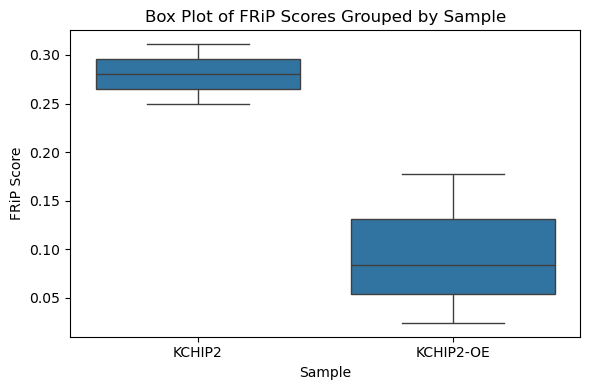

In [22]:
##== Python command ==##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot with seaborn
plt.figure(figsize=(6, 4))

# Box plot of FRiP scores grouped by Sample 
sns.boxplot(x='Sample', y='FRiP', data=df)

# Add titles and labels
plt.title('Box Plot of FRiP Scores Grouped by Sample')
plt.xlabel('Sample')
plt.ylabel('FRiP Score')

# Display the plot
plt.tight_layout()
plt.show()

# Genome browser
* Typically we are interested in visualizing a chromatin landscape in regions using a genome browser.

* You can input **bed** and **bedgraph** file

* [The Integrative Genomic Viewer(IGV)](https://igv.org/doc/desktop/)provides a web app version and a local desktop version that is easy to use.

* [The UCSC Genome Browser](https://genome.ucsc.edu/) provides the most comprehensive supplementary genome information.

<img src="./picture/057.png" width="900"/>

# Normalization methods

## RPKM

**RPKM(Reads Per Kilobase Million)**

* **Definition**: Normalizes read counts by both the sequencing depth (in millions of reads) and the length of each region (in kilobases).

* **Purpose**: Corrects for sequencing depth and gene/feature length, commonly used in RNA-seq.

$$
\text{RPKM} = \frac{\text{reads in a region} \times 10^9}{\text{total mapped reads} \times \text{region length(measured in base pairs) }}
$$

## CPM

**CPM (Counts Per Million)**

* **Definition**: Normalizes read counts based only on sequencing depth, ignoring region length.

* **Purpose**: Useful when comparing coverage across samples with different read counts, but region length is not a consideration.

$$
\text{CPM} = \frac{\text{reads in a region} \times 10^6}{\text{total mapped reads}}
$$


## BPM

**BPM (Bins Per Million mapped reads)**

* **Definition**: Similar to CPM but applies normalization across **equal-size bins** rather than distinct genomic regions.

* **Purpose**: Often used in whole-genome coverage analysis, where it’s important to normalize read counts across consistent bins.

    * **equal-size bins** ：dividing the entire genome into segments or windows of the same fixed length (e.g., 100 bp, 500 bp, or 1 kb)

$$
\text{BPM} = \frac{\text{reads in a bin} \times 10^6}{\text{total mapped reads}}
$$


## RPGC

**RPGC (Reads Per Genomic Content)**

* **Definition**: Normalizes read counts based on the **effective genome size**, usually to adjust for mappability in the genome. It’s commonly used in ChIP-seq and ATAC-seq.

    * **Effective Genome Size**:This refers to the mappable portion of the genome. For example, the human genome is about 3 billion base pairs, but due to repetitive sequences, only a portion of it (~2.7 billion base pairs) is actually usable for most short-read alignments.
    
    * By using the effective genome size, you account only for the regions where reads can be uniquely mapped, which makes the normalization more accurate, especially for data like ChIP-seq or ATAC-seq.

* **Purpose**: Useful for adjusting read counts by the mappable portion of the genome rather than total read count.

$$
\text{RPCG} =  \frac{\text{reads in a region} \times \text{effective genome size}}{\text{total mapped reads} \times \text{region length}}
$$

# Deeptools

<img src="./picture/059.png" width="800"/>
<img src="./picture/060.png" width="800"/>

* **deepTools** is a suite of python tools particularly developed for the efficient analysis of high-throughput sequencing data, such as ChIP-seq, RNA-seq or MNase-seq

* [deepTools manual](https://test-argparse-readoc.readthedocs.io/en/latest/index.html)

* [deepTools Galaxy server](https://usegalaxy.eu/) you use the deepTools within the familiar Galaxy framework without the need to master the command line

## Deeptools installation

* Requirements
   * **Python 2.7 or Python 3.x**
   * numpy >= 1.8.0
   * scipy >= 0.17.0
   * py2bit >= 0.1.0
   * pyBigWig >= 0.2.1
   * pysam >= 0.8
   * matplotlib >= 1.4.0
 
* Install

  `conda install -c bioconda deeptools`

## BamCoverage

* The [bamCoverage tool](https://test-argparse-readoc.readthedocs.io/en/latest/content/tools/bamCoverage.html), part of the deepTools suite

* It’s designed for generating **coverage tracks** (bigWig or bedGraph files) from BAM files, for visualization in genome browsers
    * **Coverage tracks** visually represent the density of reads across genomic regions, often used in genomics to interpret the depth and intensity of coverage in different regions

<img src="./picture/058.png" width="700"/>

### Parameters

In [ ]:
bamCoverage

# General Parameters
    -b <BAM>  # Input BAM file.
    -o  # Output file name (commonly with .bigWig or .bw extension).
    --outFileFormat # Format of the output file, typically bigwig or bedgraph.
    -P # Number of processors to use for multithreading, speeding up processing on larger files,(Default: 1)



# Normalization and Scaling
    --effectiveGenomeSize 
    # The effective genome size is the portion of the genome that is mappable.
    # Large fractions of the genome are stretches of NNNN that should be discarded
    #  A table of values is available here: http://deeptools.readthedocs.io/en/latest/content/feature/effectiveGenomeSize.html
    
    --exactScaling 
    # bamCoverage calculates the scaling factor based on a sample of the reads, which is faster but less precise in some situations
    # Using exactScaling modifies this behavior to calculate the scaling factor based on all reads in the BAM file

    --normalizeUsing # Specify normalization method. Options include:
                     # RPKM (Reads Per Kilobase Million)
                     # CPM (Counts Per Million)
                     # BPM (Bins Per Million mapped reads)
                     # RPGC (Reads Per Genomic Content)
                     # None (no normalization)
                     # Default: None 
    --ignoreForNormalization 
    # A list of space-delimited chromosome names containing those chromosomes that should be excluded for computing the normalization. 
    # This is useful when considering samples with unequal coverage across chromosomes, like male samples. 
    # An usage examples is --ignoreForNormalization chrX chrM



# Coverage Computation
    --binSize <int bp> 
    # Bin size (in bp) to use for calculating coverage. Smaller values yield higher resolution but increase file size.
    # Default: 50    
    
    --region <CHR:START:END> # Specify a specific genomic region to calculate coverage.   
    --smoothLength <int bp> # The smooth length defines a window, larger than the binSize, to average the number of reads.
    
    --skipNonCoveredRegions # Exclude regions with zero coverage from the output file.



#Read processing options
    --extendReads <int bp> 
    # This parameter allows the extension of reads to fragment size
    # NOTE:This feature is generally NOT recommended for spliced-read data, such as RNA-seq 
    # *Single-end*: Reads that already exceed this fragment length will not be extended. 
    # *Paired-end*: Reads with mates are always extended to match the fragment size defined by the two read mates. 
    # mate reads that map too far apart (>4x fragment length) or even map to different chromosomes are treated like single-end reads.    

    --ignoreDuplicates   
    # If set, reads that have the same orientation and start position will be considered only once. 
    # If reads are paired, the mate's position also has to coincide to ignore a read.     

    --centerReads
    # adjusts the alignment position of each read to its central location, rather than using the read’s original start or end position     
    # *Paired-end*: The read is centered based on the fragment size defined by the positions of the two mates in the pair.
    # *Single-end*: Centering requires a specified fragment length.  
    # Be use in Sharp Peak Detection,like: ATAC-seq，chip-seq，CUT&Tag。
    


# Filtering Options  
    --minMappingQuality <int>
    # Minimum mapping quality score to include reads in the coverage calculation (useful for filtering out low-quality alignments)
    
    --blackListFileName <bed> 
    # Specifies regions to exclude, useful for ignoring problematic regions like repetitive elements

    --minFragmentLength <int>
    # The minimum fragment length needed for read/pair inclusion. 
    # This option is primarily useful in ATACseq experiments, for filtering mono-or di-nucleosome fragments
    # Default: 0       

    --maxFragmentLength <int>
    # The maximum fragment length needed for read/pair inclusion. 
    # Default: 0    



# SAM flag option
    --samFlagInclude <int>  
    # This option includes reads that match a specified flag
    # For example, to get only reads that are the first mate, use a flag of 64    

    --samFlagExclude <int> 
    # This option excludes reads with a specified SAM flag    
    # For example, to get only reads that map to the forward strand, use --samFlagExclude 16



# special seq option
    --MNase 
    # Designed for MNase-seq, counts only the center 3 nucleotides of fragments between 130-200 bp for nucleosome positioning.
    # To over-write this, use the--minFragmentLength and --maxFragmentLength options, which will default to 130 and 200
    # *NOTE*: Requires paired-end data. A bin size of 1 is recommended. (default: False)
    
    --Offset <int> 
    # Specifies the base offset from the start (or end) of each read for counting coverage
    # useful for methods like RiboSeq or GROseq.
    # A value of 1 indicates the first base of the alignment (taking alignmentorientation into account). 
    # Likewise, a value of -1 is the last base of the alignment
    # If two values are specified, then they will be used to specify arange of positions

    --filterRNAstrand <forward,reverse> 
    # Filters reads based on the strand
    # This is particularly relevant for libraries prepared with strand-specific protocols, like dUTP-based library preparation

# Convert Bam to BigWIG

* We use [Samtools sort](#Samtools-sort) to sort the BAM file

* We use [BamCoverage of deeptools](#BamCoverage) to convert BAM to BigWIG

In [ ]:
##== linux command ==##
#!/bin/bash
# create bigwig folder
mkdir -p ./bigwig

# Define the threads
threads=10

# Define the variables
samples=("KCHIP2" "KCHIP2-OE")

# BAM directory
bigwigDir="bigwig"

# BAM directory
bamDir="deduplicated.bam"

# Loop over the samples
for sample in "${samples[@]}"; do

    # BAM file path
    bam_file="${bamDir}/filter${sample}deduplicated.bam"
    sort_bam_file="${bamDir}/filter${sample}deduplicated.sort.bam"
    
    # Sort the BAM file (skip sorting if sorted already)
    if [[ ! -f "$sort_bam_file" ]]; then
        echo "Sorting BAM file: $bam_file"
        samtools sort -o "$sort_bam_file" "$bam_file" -@ "$threads"
    fi                                                    

    # create index
    samtools index "$sort_bam_file"

    # bigwig file path
    bigwig_file="${bigwigDir}/filter${sample}deduplicated.sort.bigwig"
    
    # convert BAM TO bigwig
    bamCoverage -b "$sort_bam_file" -o "$bigwig_file"
done

## Heatmap visualization of specific regions

* We are also interested in looking at chromatin features at a list of annotated sites

* For example,  We can use the **computeMatrix** and **plotHeatmap** functions from deepTools to generate the heatmap of gene promoters

In [ ]:
##== linux command ==##
# 
mkdir ./bigwig                                                                                                                                        
samtools sort -o $projPath/alignment/bam/${histName}.sorted.bam $projPath/alignment/bam/${histName}_bowtie2.mapped.bam                                                     
samtools index $projPath/alignment/bam/${histName}.sorted.bam                                                                                                              
bamCoverage -b $projPath/alignment/bam/${histName}.sorted.bam -o $projPath/alignment/bigwig/${histName}_raw.bw  